Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from datetime import datetime
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
student_df1 = pd.read_csv('./content/student_sleep_patterns.csv')
productivity_df1 = pd.read_csv('./content/sleep_cycle_productivity.csv')
efficiency_df1 = pd.read_csv('./content/Sleep_Efficiency.csv')

print("student: ", student_df1.columns.tolist()[:7])
print(student_df1.head())
print("productivity: ", productivity_df1.columns.tolist()[:7])
print(productivity_df1.head())
print("efficiency: ", efficiency_df1.columns.tolist()[:7])
print(efficiency_df1.head())


student:  ['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration', 'Study_Hours', 'Screen_Time']
   Student_ID  Age Gender University_Year  Sleep_Duration  Study_Hours  \
0           1   24  Other        2nd Year             7.7          7.9   
1           2   21   Male        1st Year             6.3          6.0   
2           3   22   Male        4th Year             5.1          6.7   
3           4   24  Other        4th Year             6.3          8.6   
4           5   20   Male        4th Year             4.7          2.7   

   Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0          3.4                2                 37             10   
1          1.9                5                 74              2   
2          3.9                5                 53              5   
3          2.8                4                 55              9   
4          2.7                0                 85              3   

   Weekday_Sleep_Start  Weekend

Student df drop unuse features

Columns after dropping unnecessary ones: ['Age', 'Gender', 'University_Year', 'Sleep_Duration', 'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity', 'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End']
             Age  University_Year  Sleep_Duration  Study_Hours  Screen_Time  \
count  500.00000       500.000000      500.000000   500.000000   500.000000   
mean    21.53600         2.462000        6.472400     5.981600     2.525000   
std      2.33315         1.094968        1.485764     3.475725     0.859414   
min     18.00000         1.000000        4.000000     0.100000     1.000000   
25%     20.00000         1.750000        5.100000     2.900000     1.800000   
50%     21.00000         2.000000        6.500000     6.050000     2.600000   
75%     24.00000         3.000000        7.800000     8.800000     3.300000   
max     25.00000         4.000000        9.000000    12.000000     4.000000   

       Caffeine_I

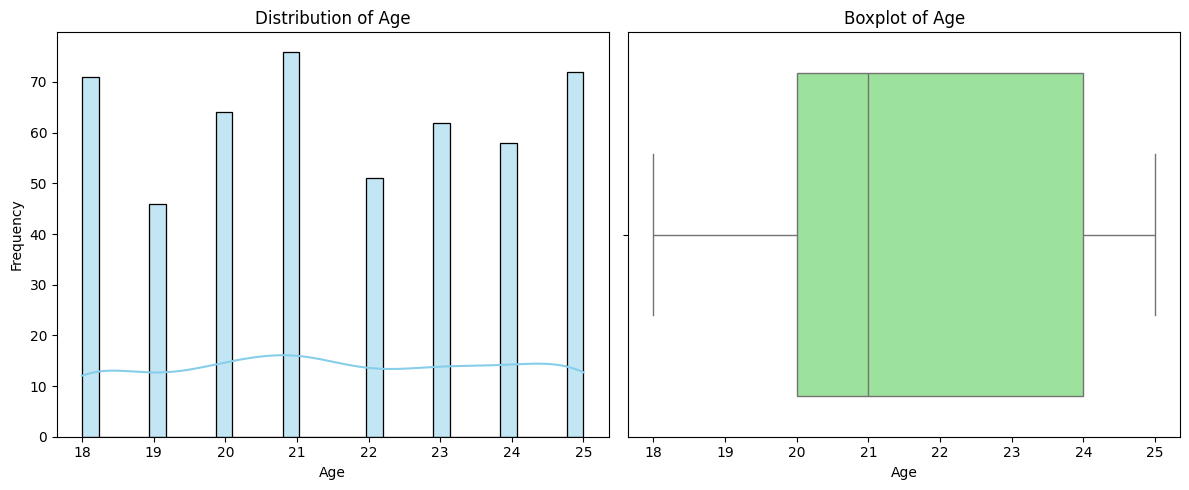

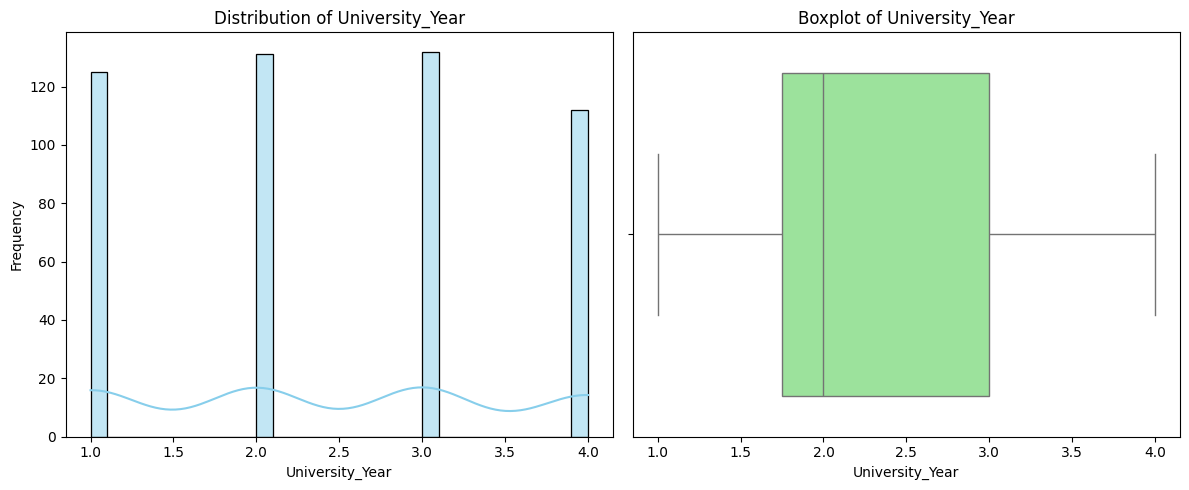

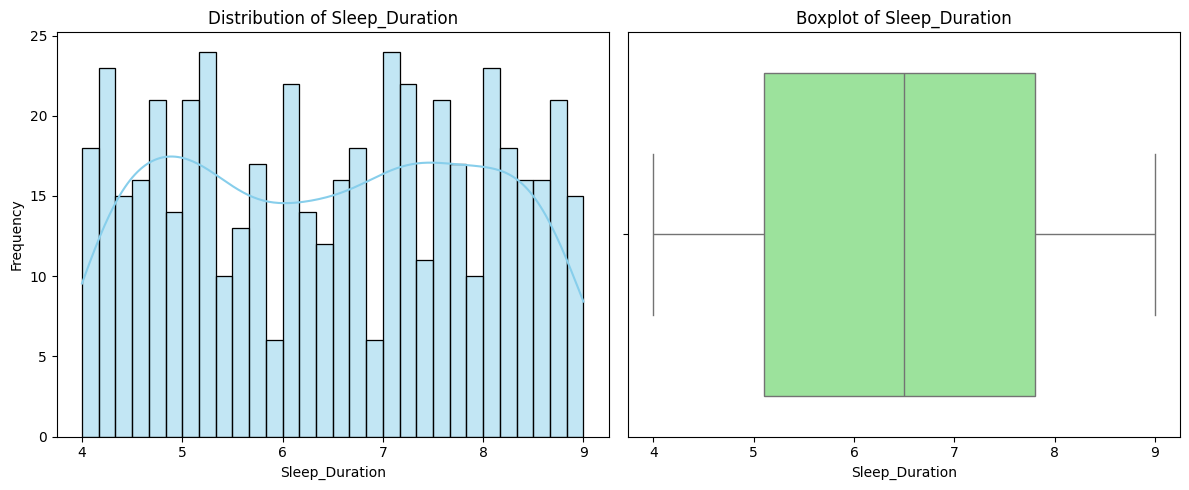

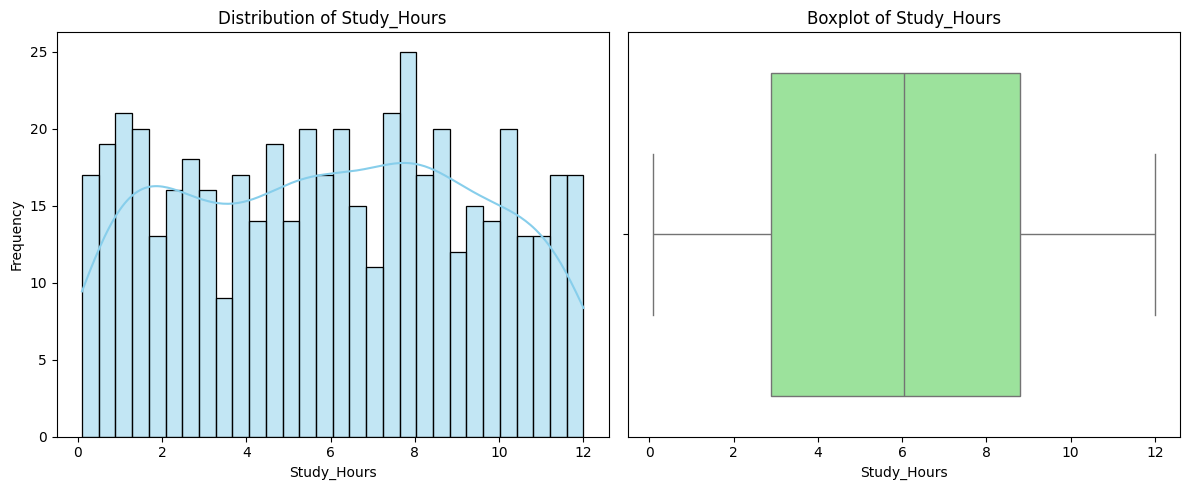

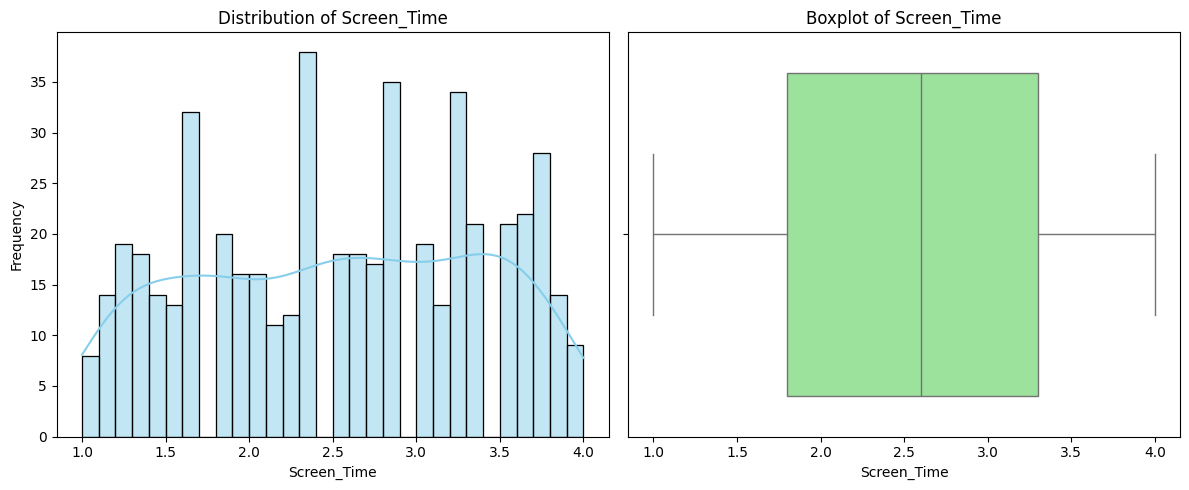

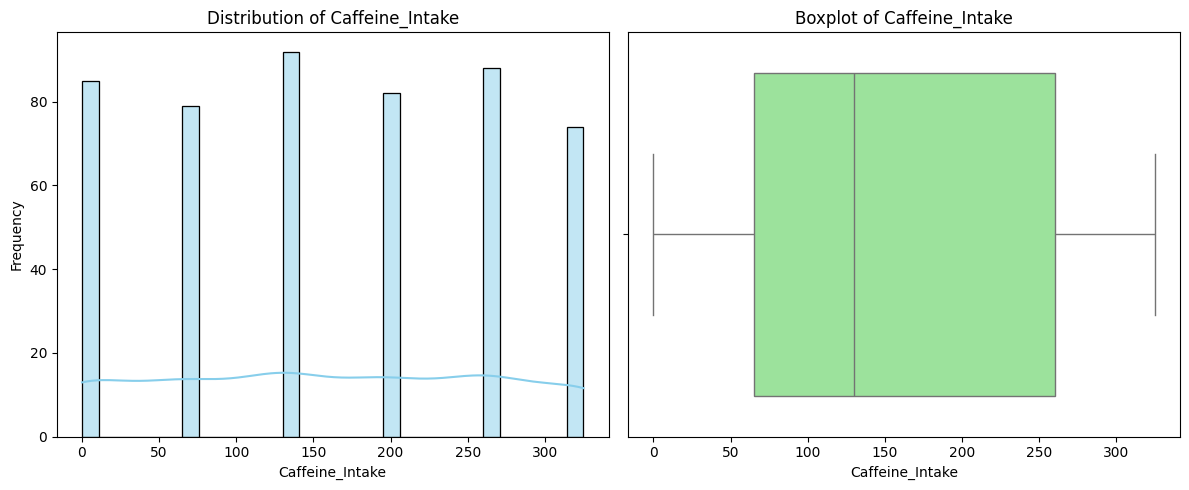

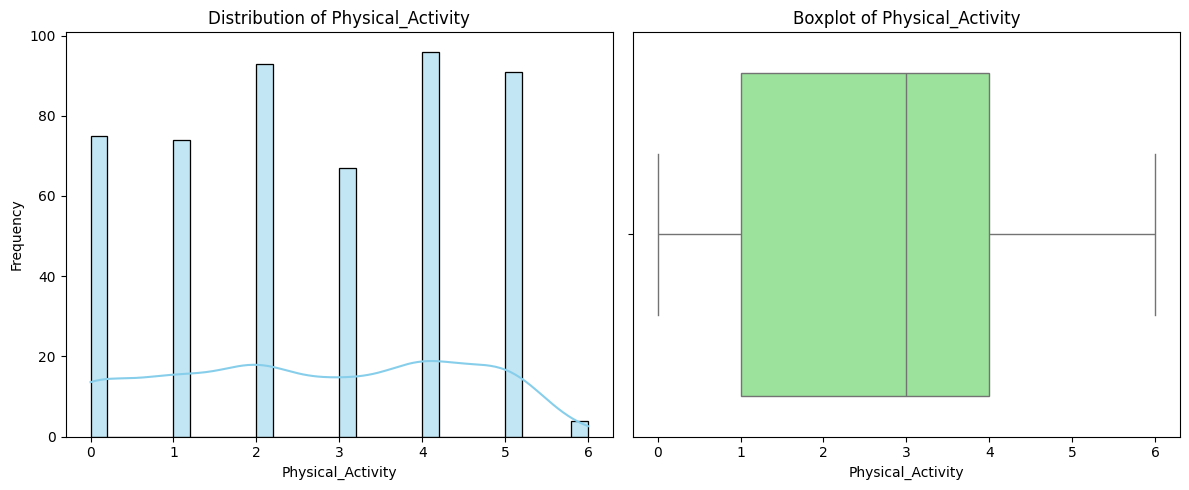

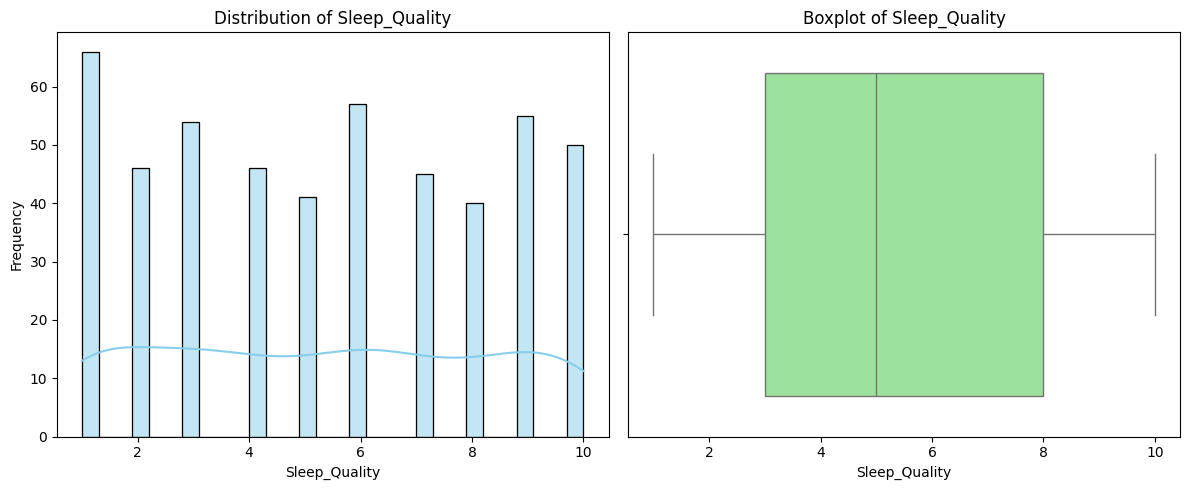

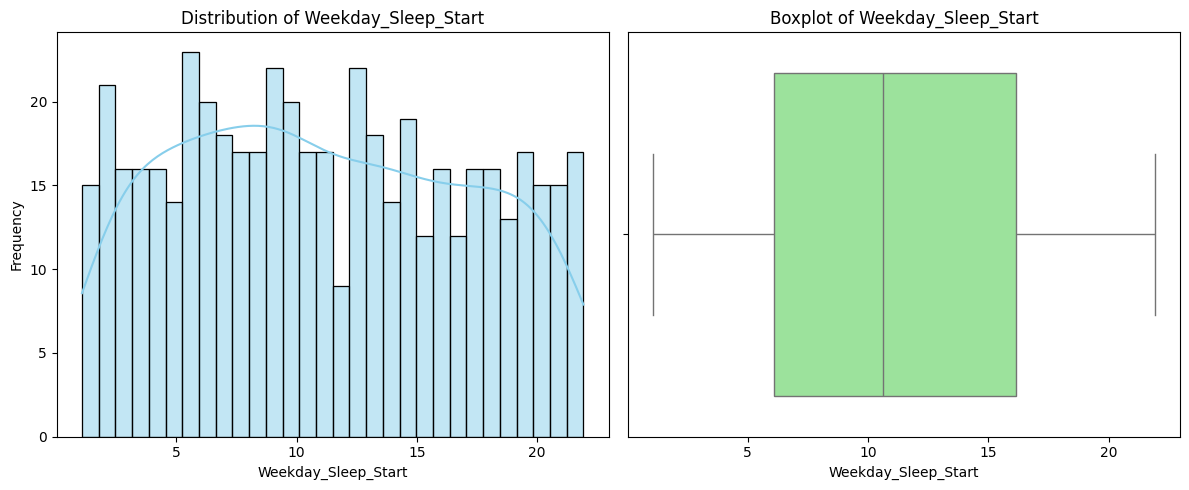

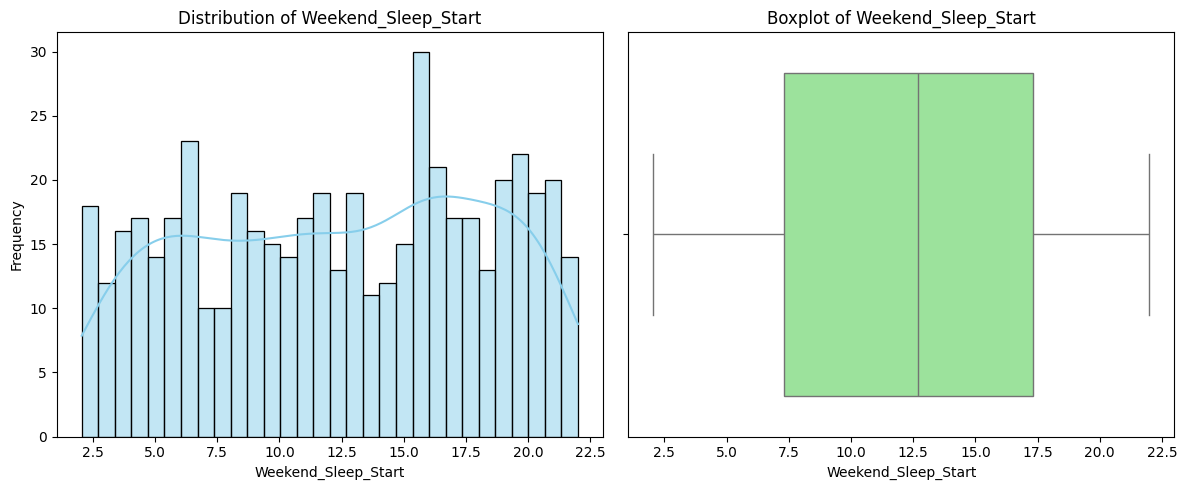

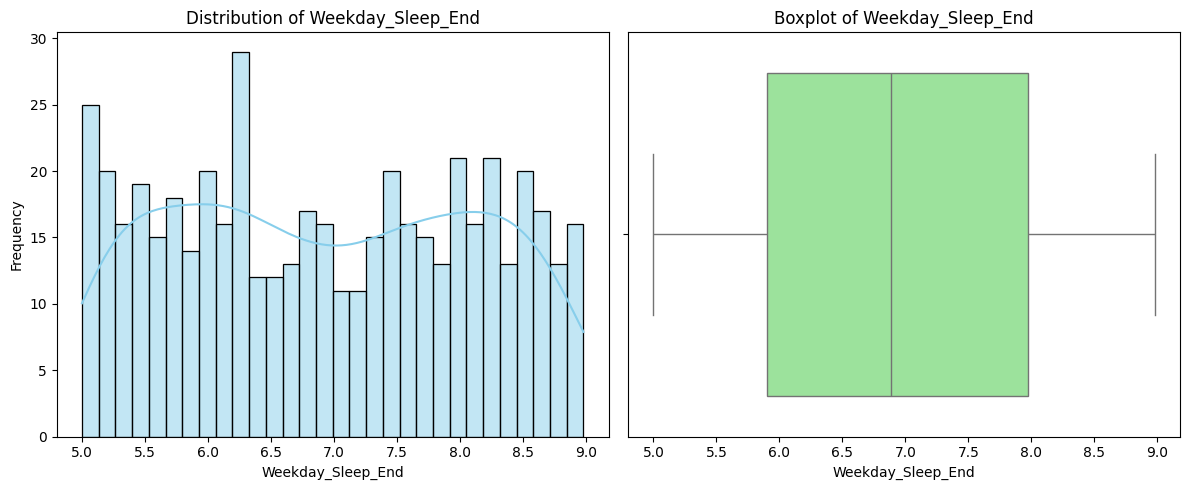

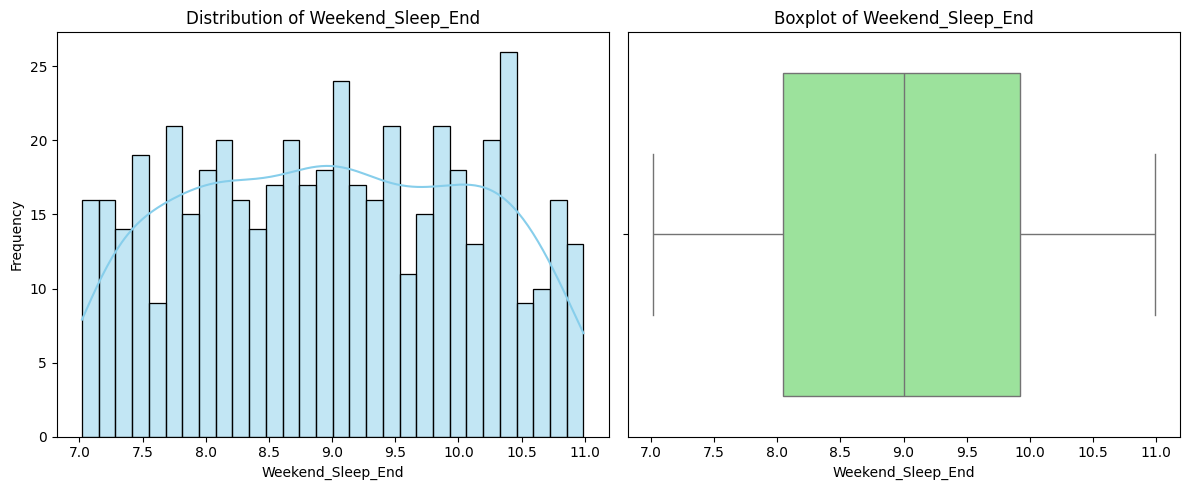

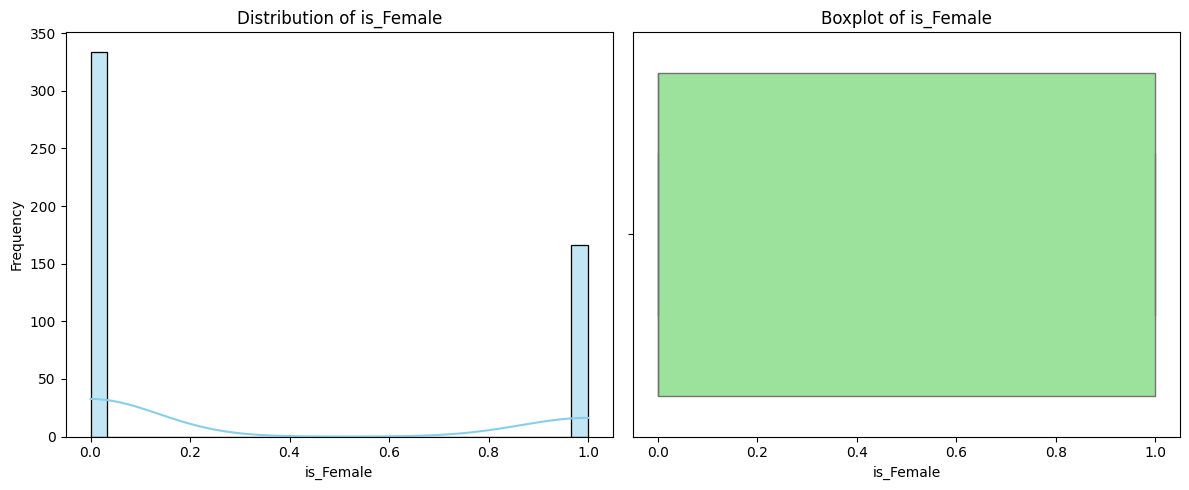

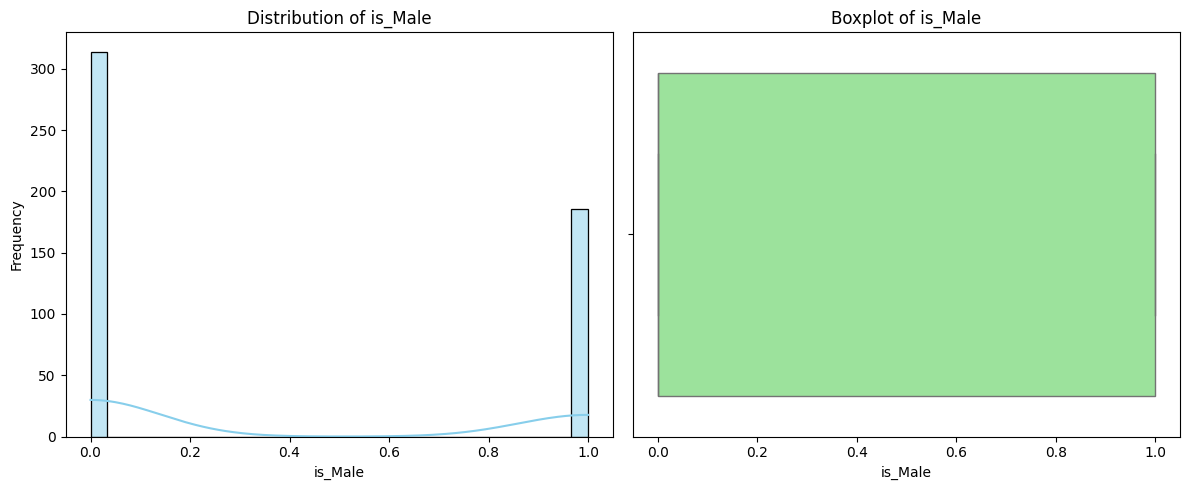

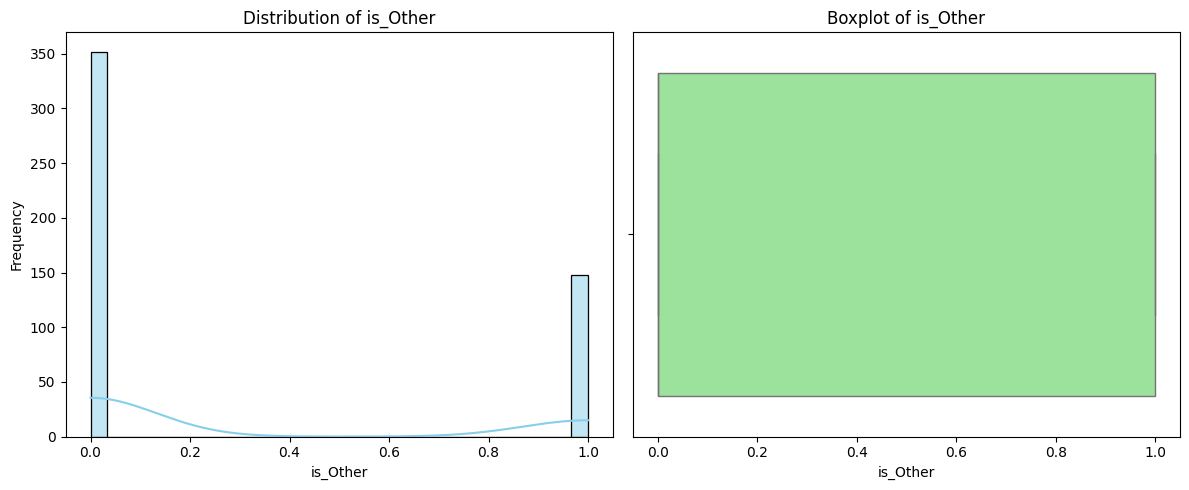

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
student_df = pd.read_csv('./content/student_sleep_patterns.csv')

# Drop unnecessary columns
columns_to_drop = ['Student_ID']  # Replace with actual column names
student_df = student_df.drop(columns=columns_to_drop, errors='ignore')
print("Columns after dropping unnecessary ones:", student_df.columns.tolist())

# Convert 'Caffeine_Intake' to mg
student_df['Caffeine_Intake'] = student_df['Caffeine_Intake'] * 65

# Convert Exercise_Duration to weekly frequency
student_df.loc[student_df['Physical_Activity'] >= 0, 'Physical_Activity'] = student_df['Physical_Activity'] // 20

# Convert 'University_Year' to numeric values
student_df['University_Year'] = student_df['University_Year'].str.extract('(\d+)').astype(int)

# Ensure there are no leading/trailing spaces and standardize the Gender column
student_df['Gender'] = student_df['Gender'].str.strip().str.capitalize()

# One-hot encoding: is_Male, is_Female, is_Other
gender_one_hot = pd.get_dummies(student_df['Gender'], prefix='is')
gender_one_hot = gender_one_hot.astype(int)
student_df = pd.concat([student_df.drop(columns=['Gender']), gender_one_hot], axis=1)

# Display basic statistics
print(student_df.describe())
print(student_df.head())
print(student_df.isnull().sum())

# Visualize feature distributions
def visualize_feature_distributions(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for feature in numeric_features:
        plt.figure(figsize=(12, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature], color='lightgreen')
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        
        plt.tight_layout()
        plt.show()

# Call the visualization function
visualize_feature_distributions(student_df)

productivity df drop unuse features

Columns in the dataset: ['Date', 'Person_ID', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time', 'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)', 'Caffeine Intake (mg)', 'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)', 'Productivity Score', 'Mood Score', 'Stress Level']
Dataset statistics:
               Age  Sleep Start Time  Sleep End Time  Total Sleep Hours  \
count  5000.000000       5000.000000     5000.000000        5000.000000   
mean     38.590600         22.005350        4.980262           6.974902   
std      12.302799          1.157591        1.862508           1.454033   
min      18.000000         20.000000        0.560000           4.500000   
25%      28.000000         21.020000        3.660000           5.690000   
50%      39.000000         22.020000        4.970000           6.960000   
75%      49.000000         23.000000        6.310000           8.210000   
max      59.000000         23.980000        9.420000           9.500000   

       Sl

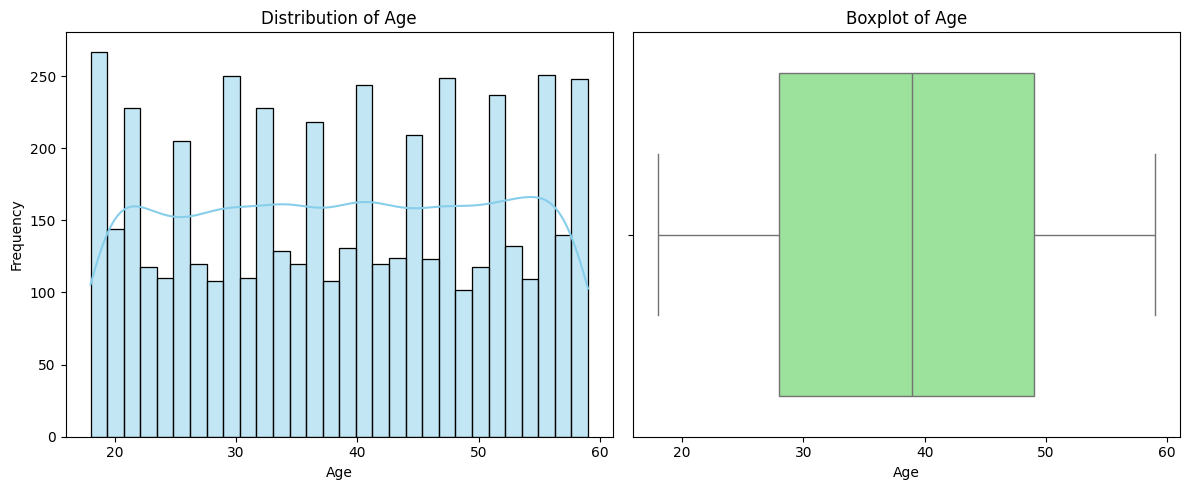

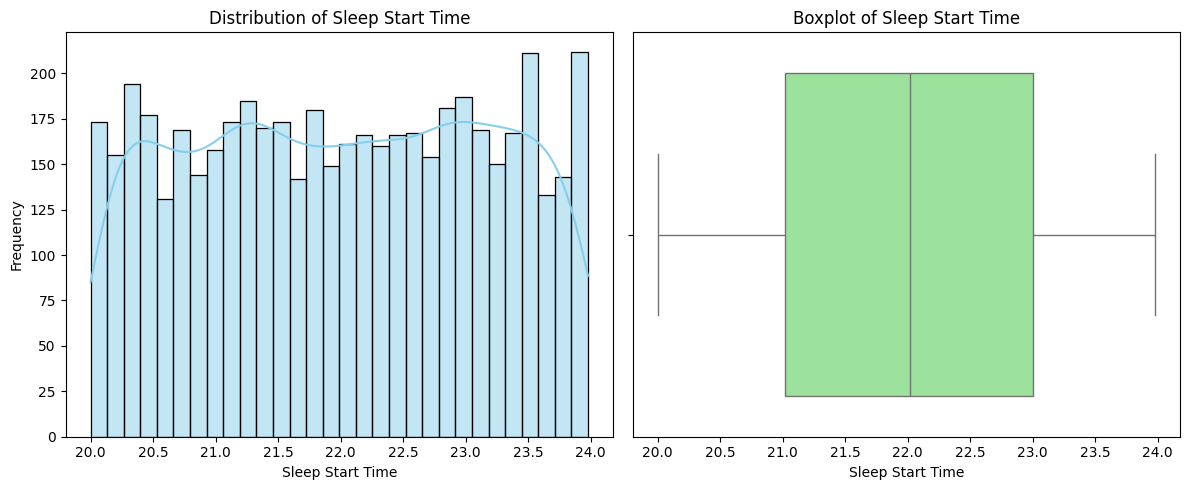

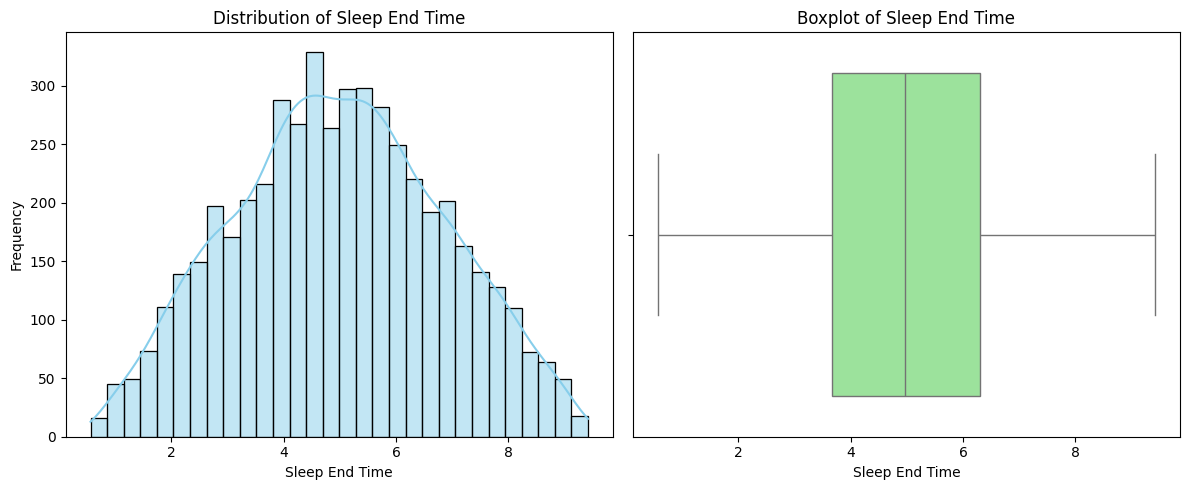

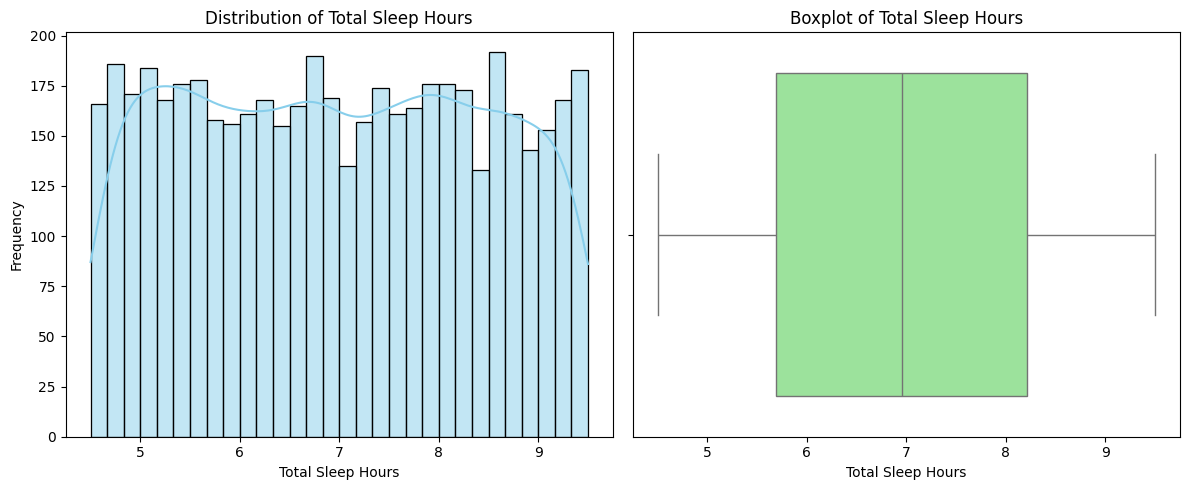

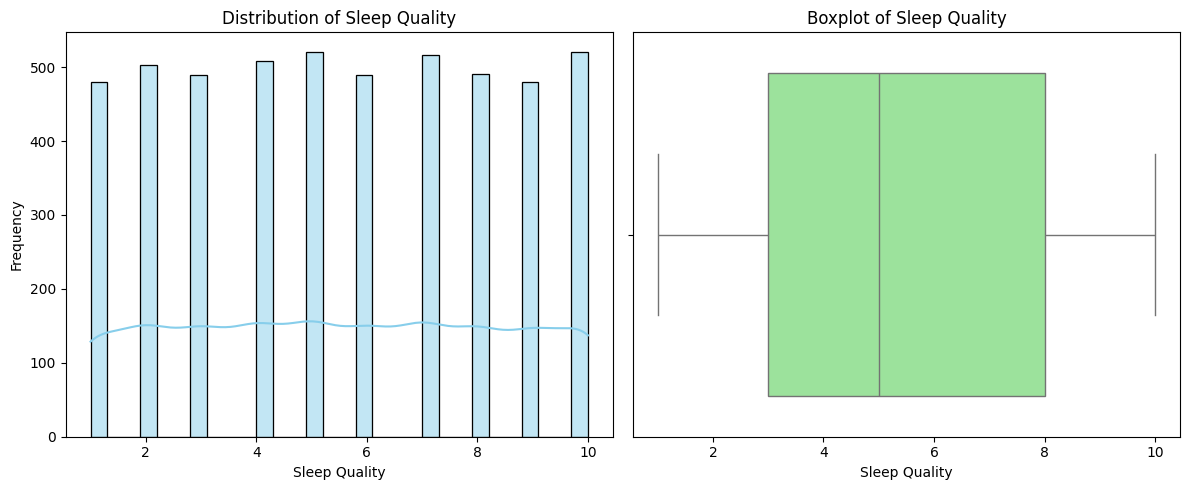

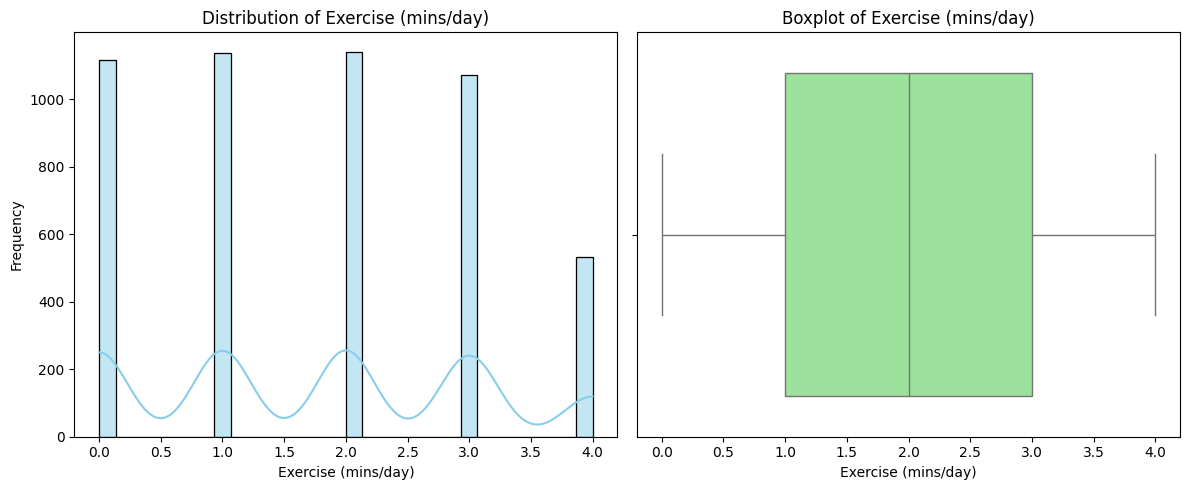

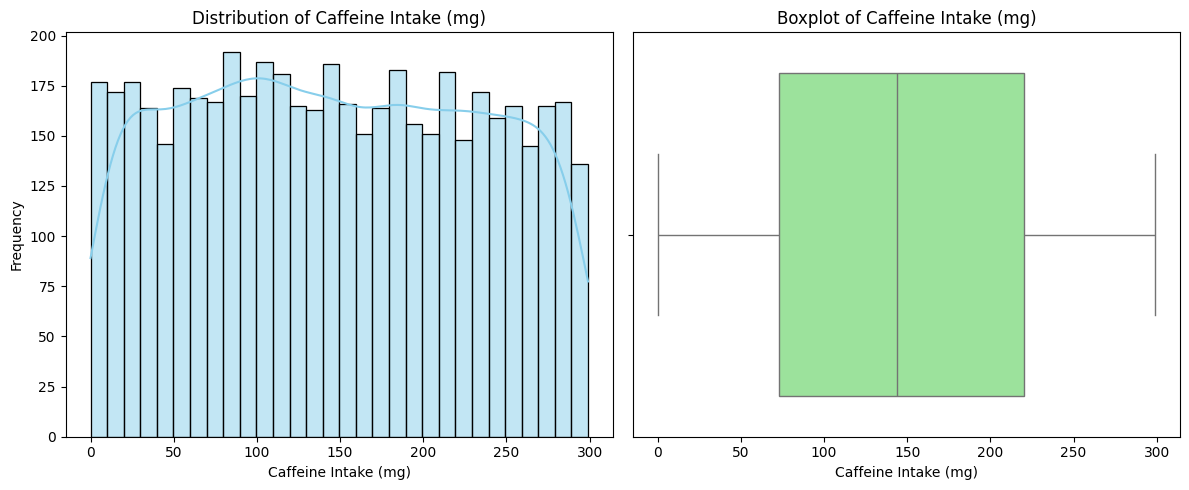

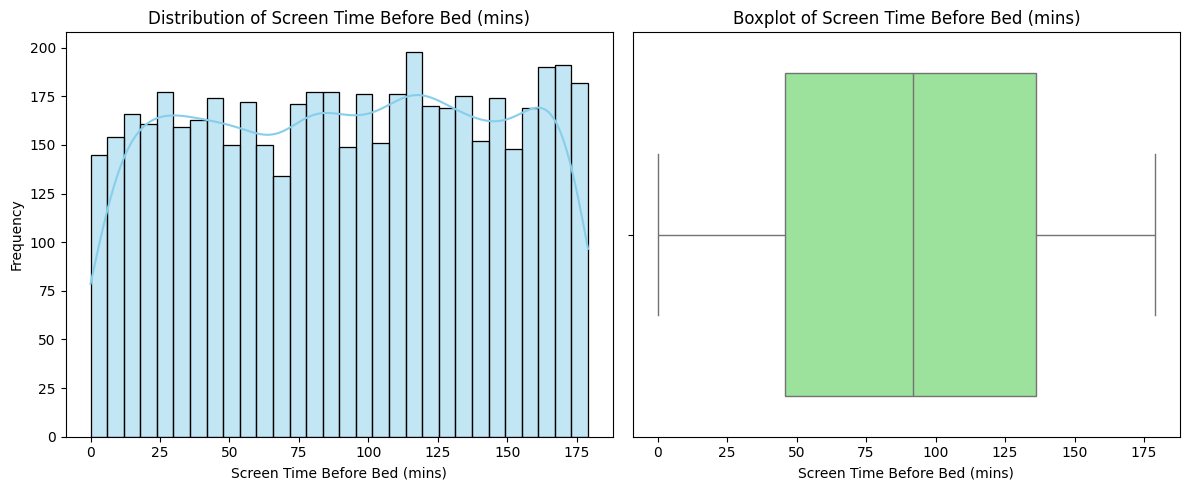

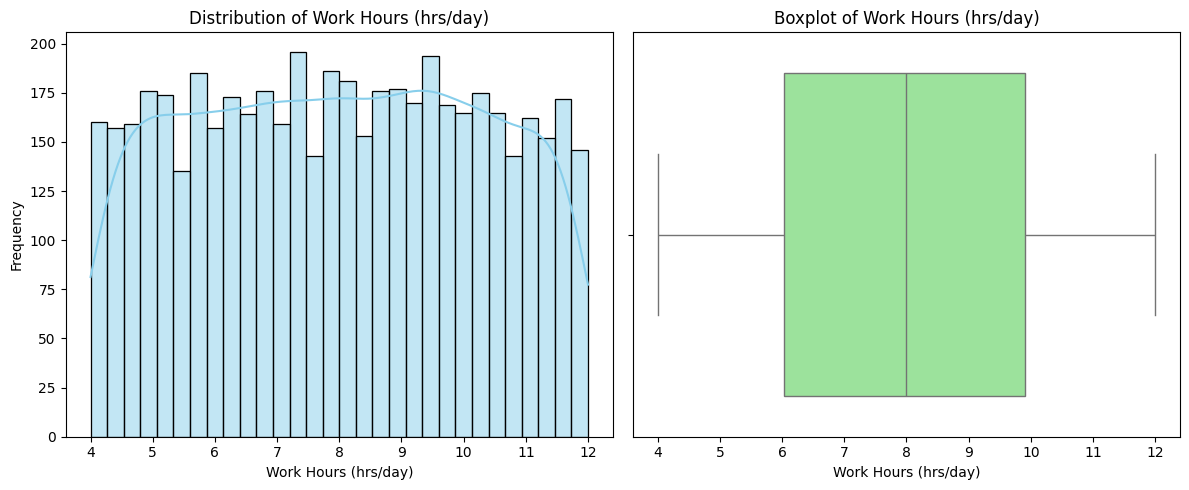

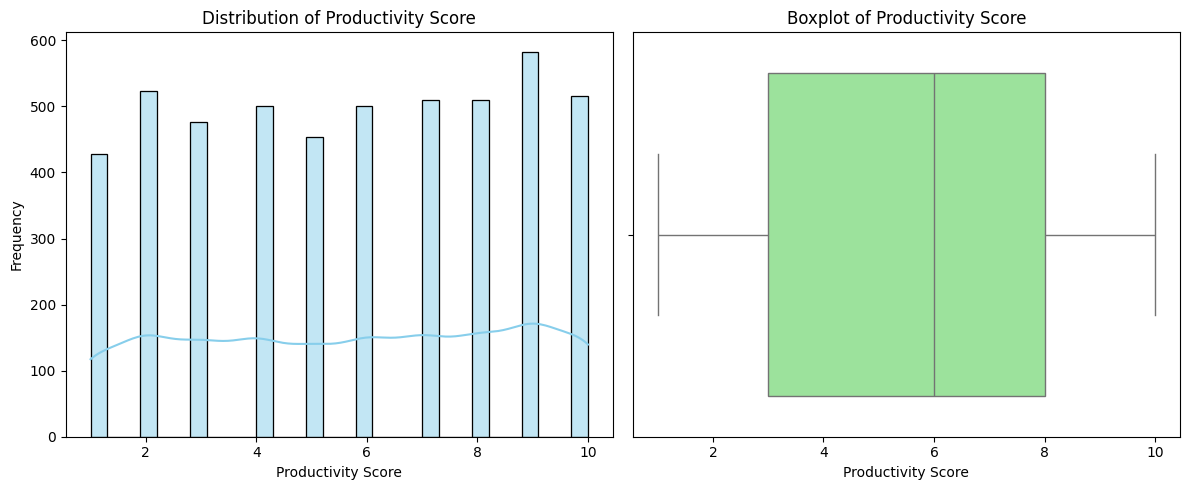

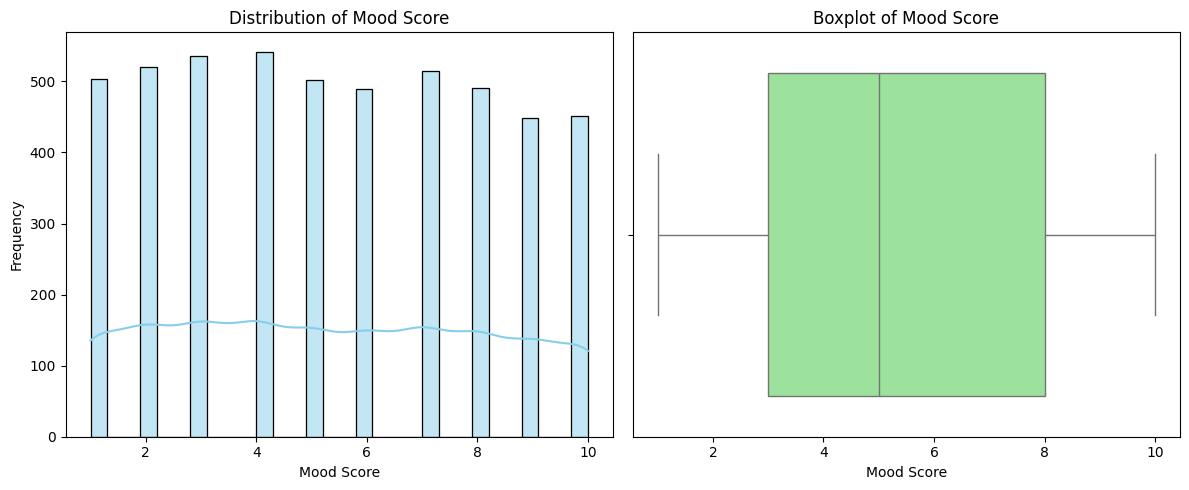

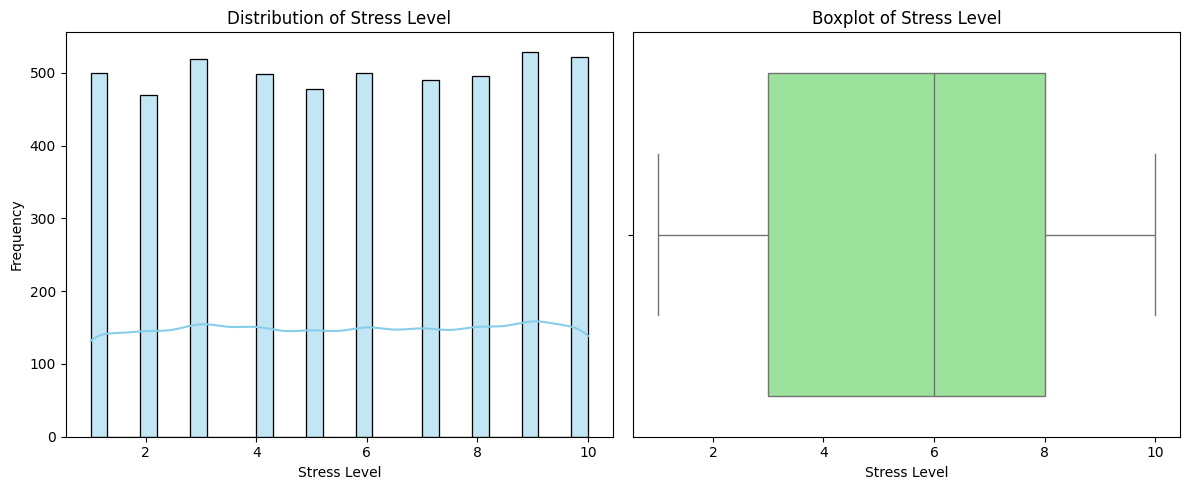

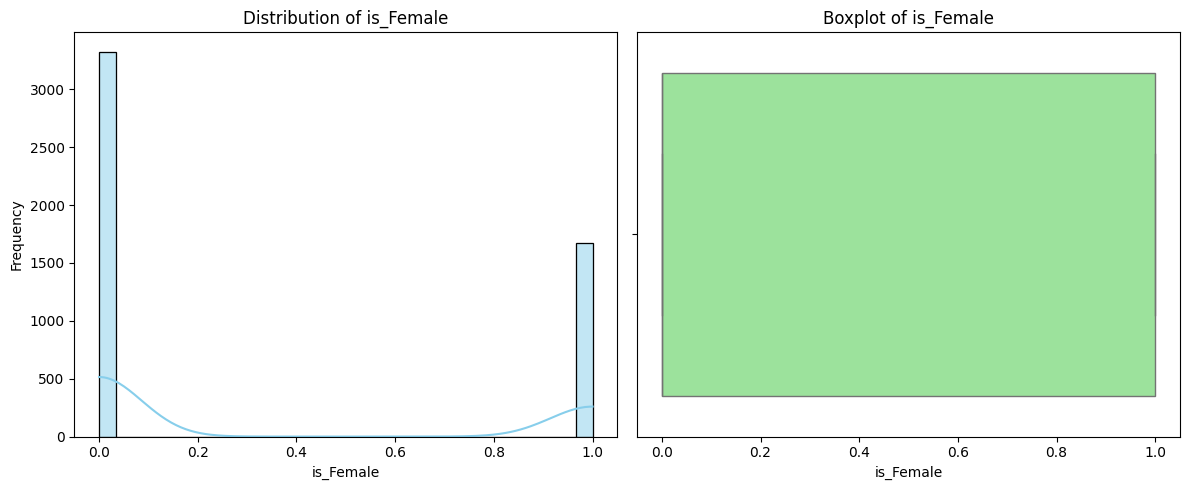

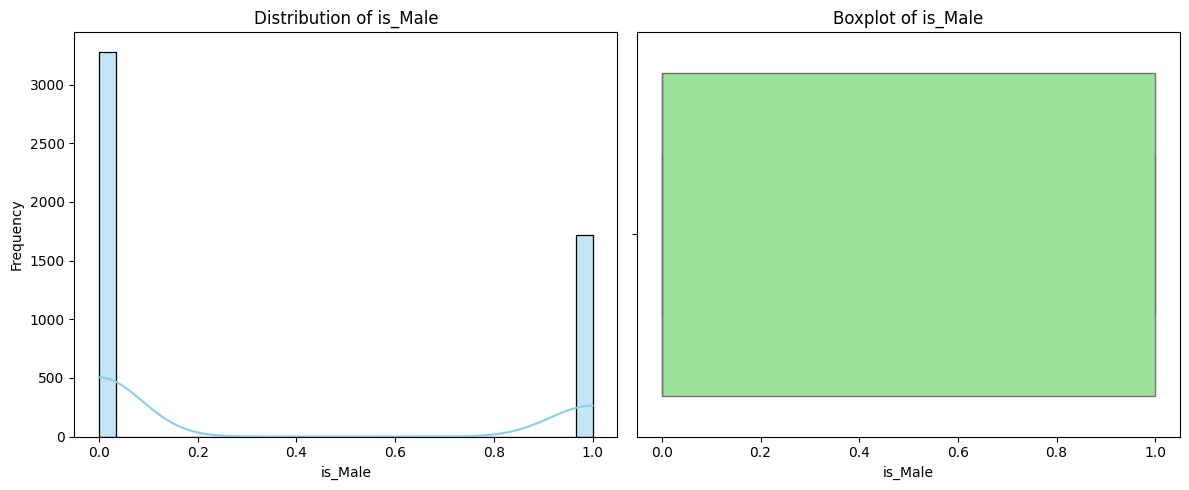

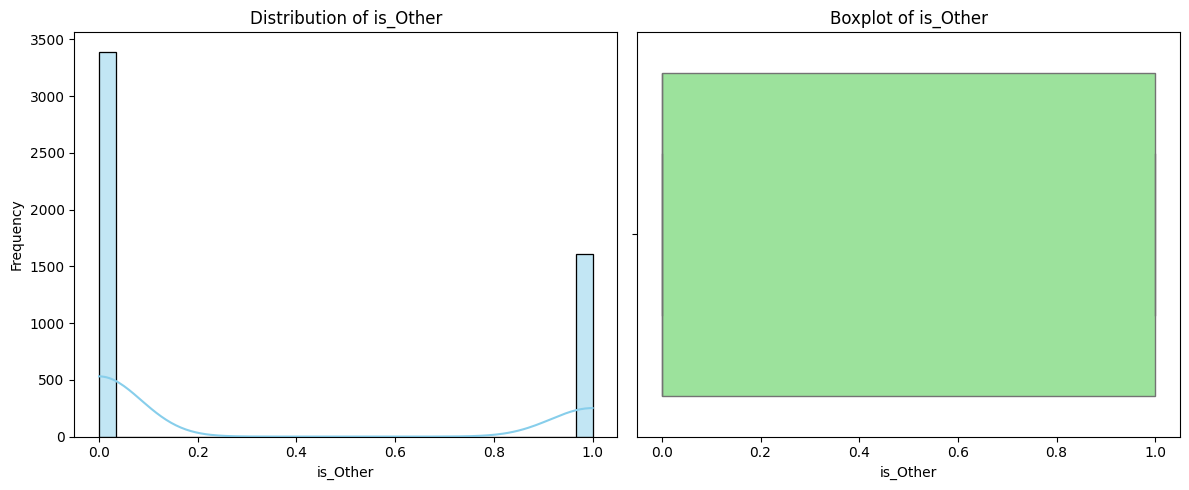

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
productivity_df = pd.read_csv('./content/sleep_cycle_productivity.csv')

# Display column names
print("Columns in the dataset:", productivity_df.columns.tolist())

# Drop unnecessary columns
columns_to_drop = ['Date', 'Person_ID']  # Replace with actual column names
productivity_df = productivity_df.drop(columns=columns_to_drop, errors='ignore')

# Convert 'Exercise (mins/day)' to weekly frequency (grouped into 20-minute intervals)
productivity_df.loc[productivity_df['Exercise (mins/day)'] >= 0, 'Exercise (mins/day)'] = productivity_df['Exercise (mins/day)'] // 20

# Ensure there are no leading/trailing spaces and standardize the Gender column
productivity_df['Gender'] = productivity_df['Gender'].str.strip().str.capitalize()

# One-hot encoding: is_Male, is_Female, is_Other
gender_one_hot = pd.get_dummies(productivity_df['Gender'], prefix='is')
gender_one_hot = gender_one_hot.astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
productivity_df = pd.concat([productivity_df.drop(columns=['Gender']), gender_one_hot], axis=1)

# Display basic statistics
print("Dataset statistics:")
print(productivity_df.describe())

# Display the first few rows of the updated DataFrame
print("First few rows of the updated DataFrame:")
print(productivity_df.head())

# Check for missing values
print("Missing values in each column:")
print(productivity_df.isnull().sum())

# Visualize feature distributions
def visualize_feature_distributions(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for feature in numeric_features:
        plt.figure(figsize=(12, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature], color='lightgreen')
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        
        plt.tight_layout()
        plt.show()

# Visualize feature distributions
visualize_feature_distributions(productivity_df)

# Visualize feature distributions by gender
def visualize_by_gender(df, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='is_Male', y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by Gender (is_Male)')
    plt.xlabel('is_Male (1 = Male, 0 = Not Male)')
    plt.ylabel(feature)
    plt.show()

# Example: Visualize 'Productivity_Score' by gender
if 'Productivity_Score' in productivity_df.columns:
    visualize_by_gender(productivity_df, 'Productivity_Score')

Columns after dropping unnecessary ones: ['Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration', 'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Smoking status', 'Exercise frequency']
Dataset statistics:
              Age     Bedtime  Wakeup time  Sleep duration  Sleep efficiency  \
count  452.000000  452.000000   452.000000      452.000000        452.000000   
mean    40.285398   10.839602     7.101770        7.465708          0.788916   
std     13.172250   10.543924     1.955899        0.866625          0.135237   
min      9.000000    0.000000     3.000000        5.000000          0.500000   
25%     29.000000    1.000000     5.500000        7.000000          0.697500   
50%     40.000000    2.500000     7.000000        7.500000          0.820000   
75%     52.000000   22.000000     9.000000        8.000000          0.900000   
max     69.000000   23.000000    12.50000

/tmp/ipykernel_45404/3010801213.py:46: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  efficiency_df['Smoking status'] = efficiency_df['Smoking status'].replace({'No': 0, 'Yes': 1})


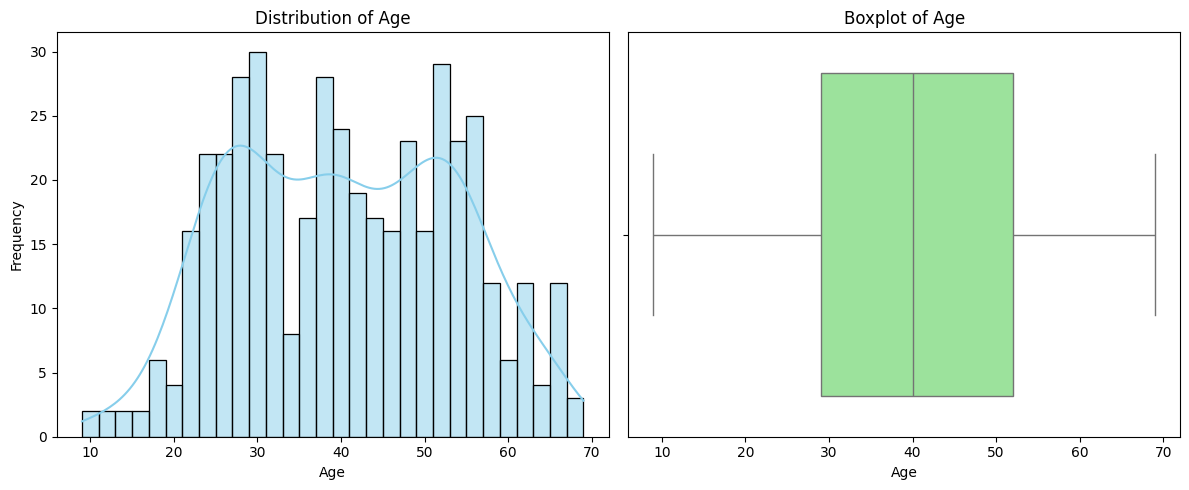

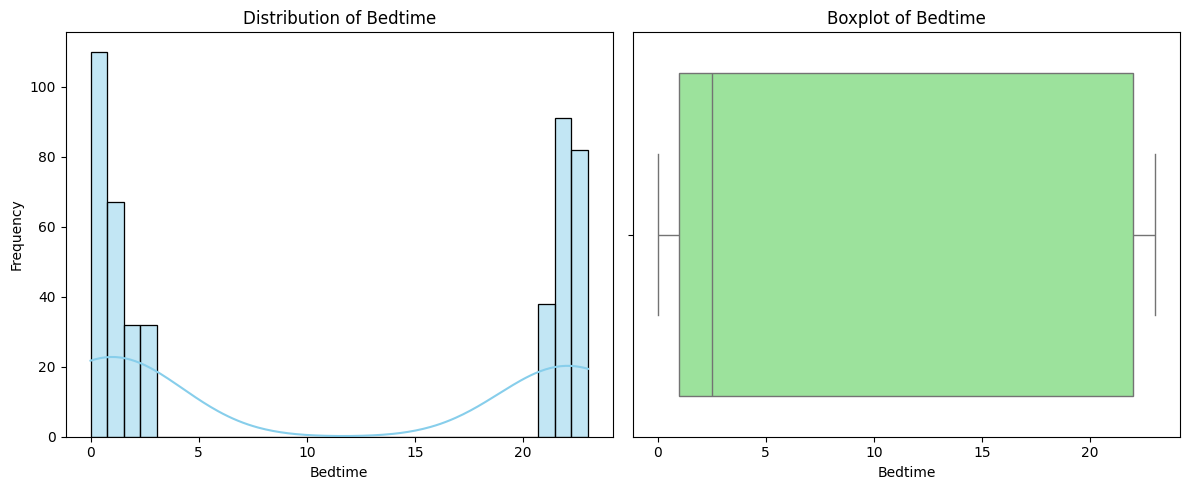

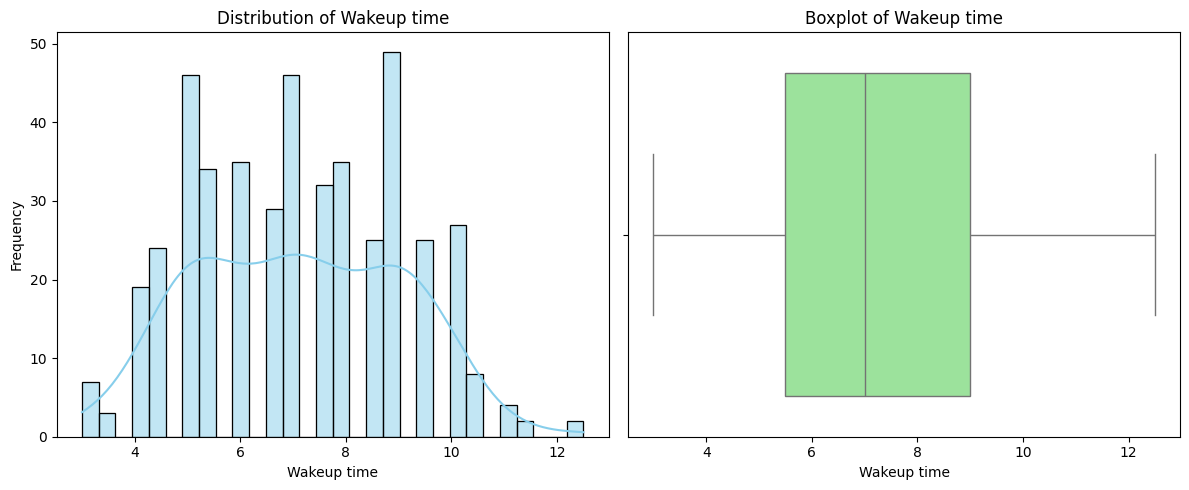

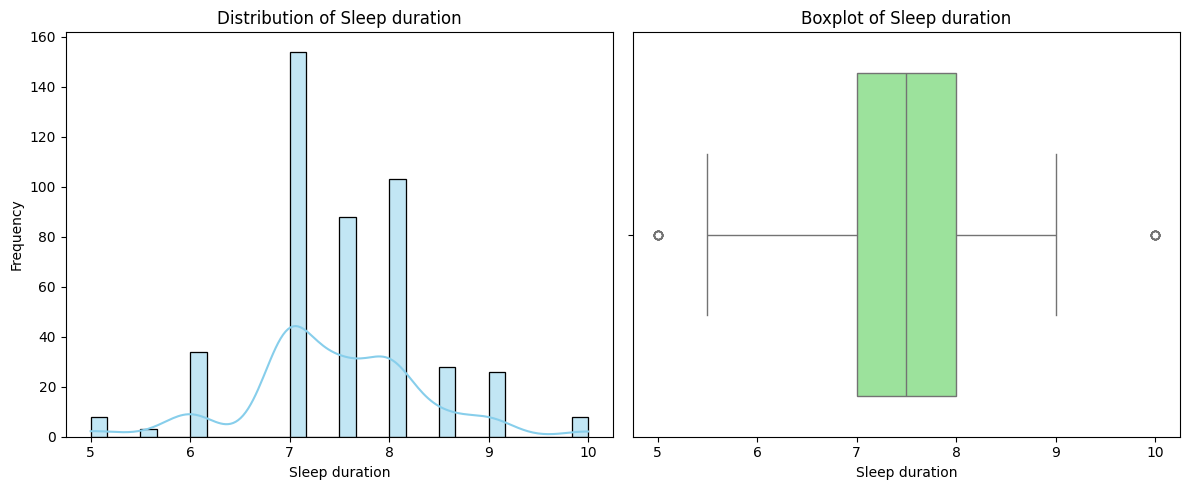

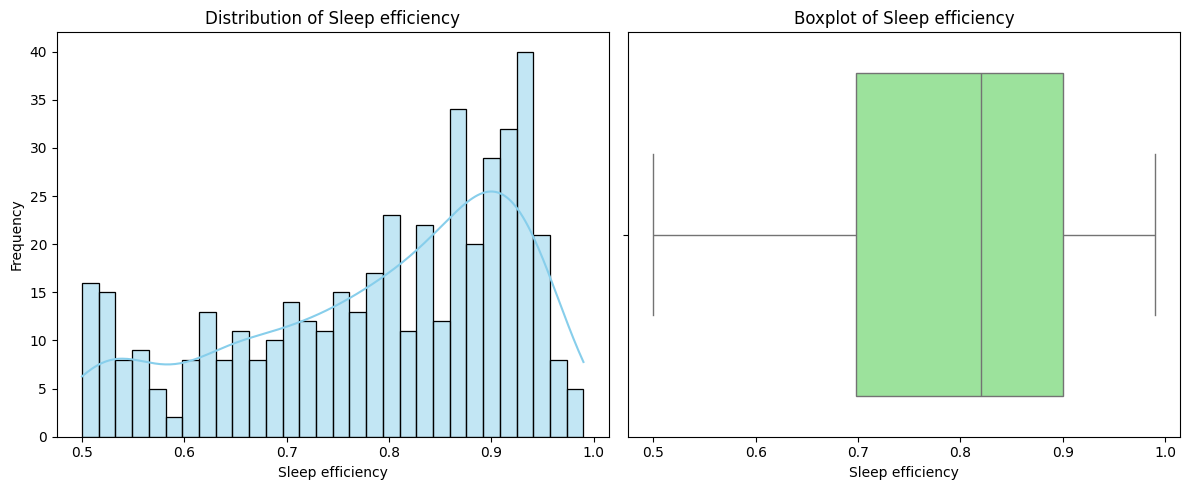

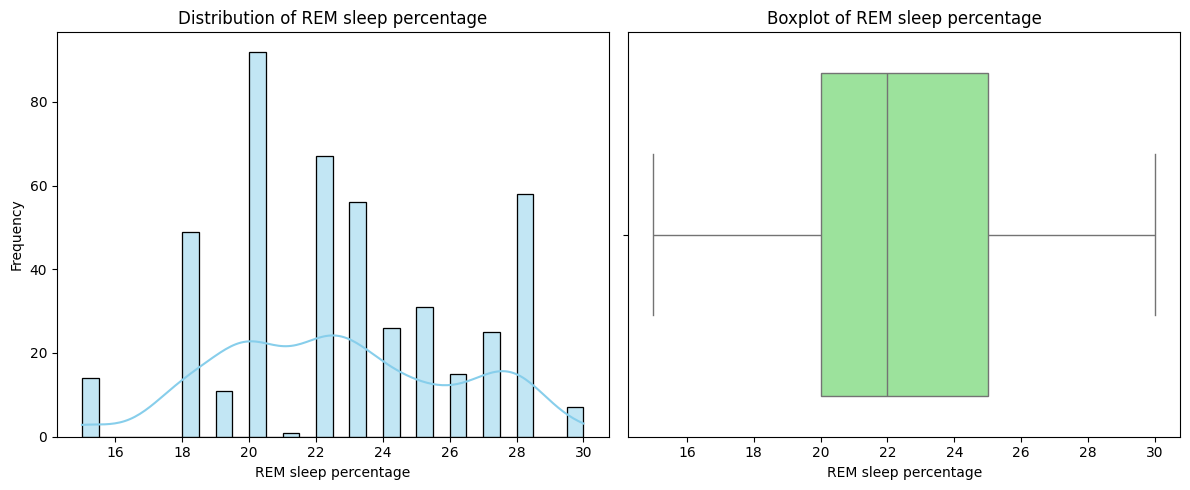

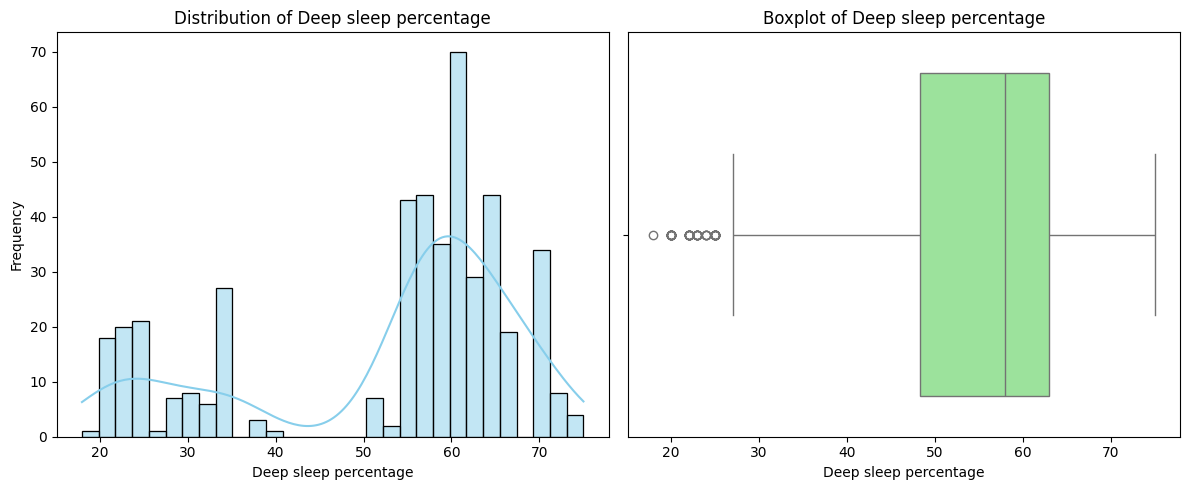

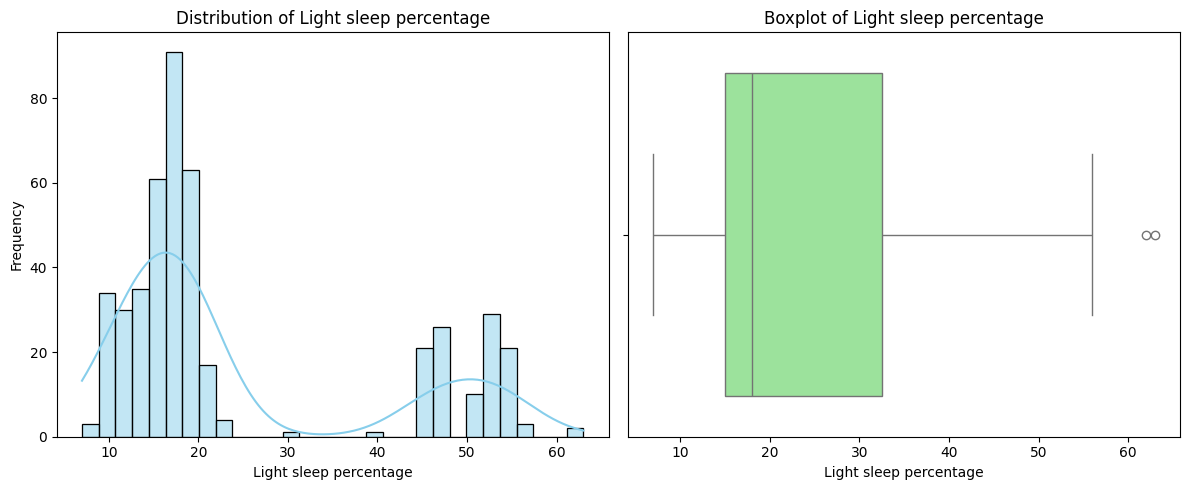

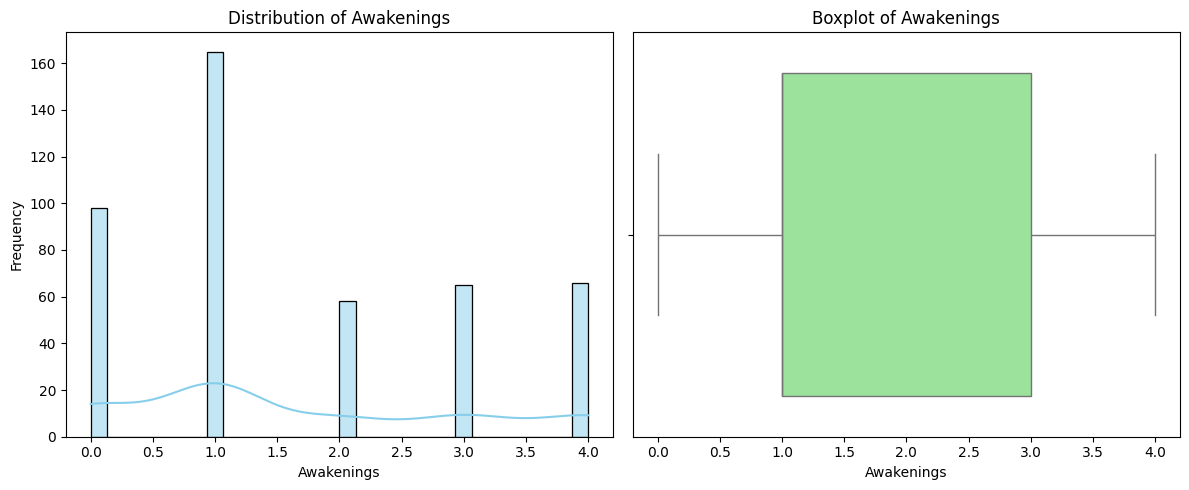

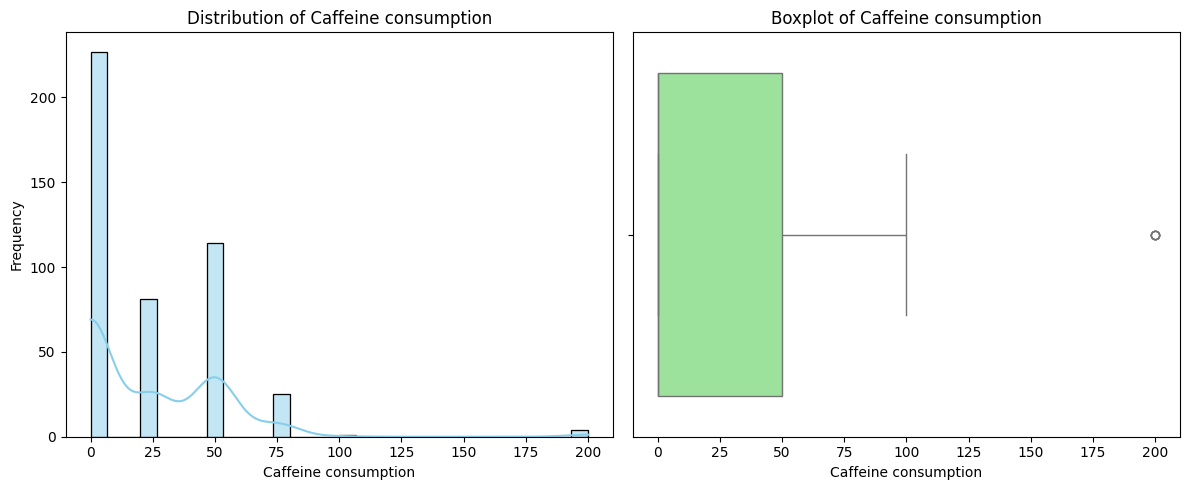

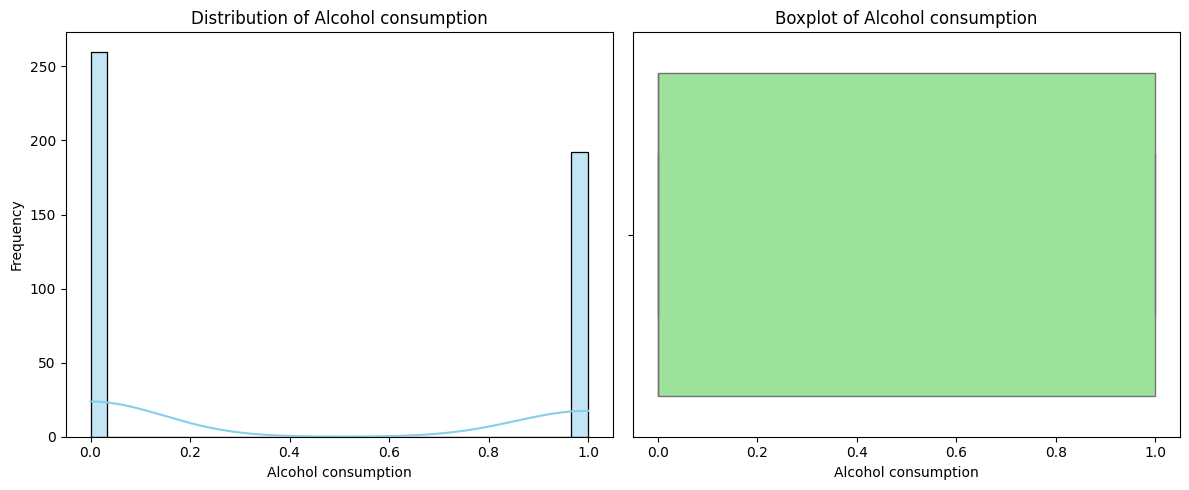

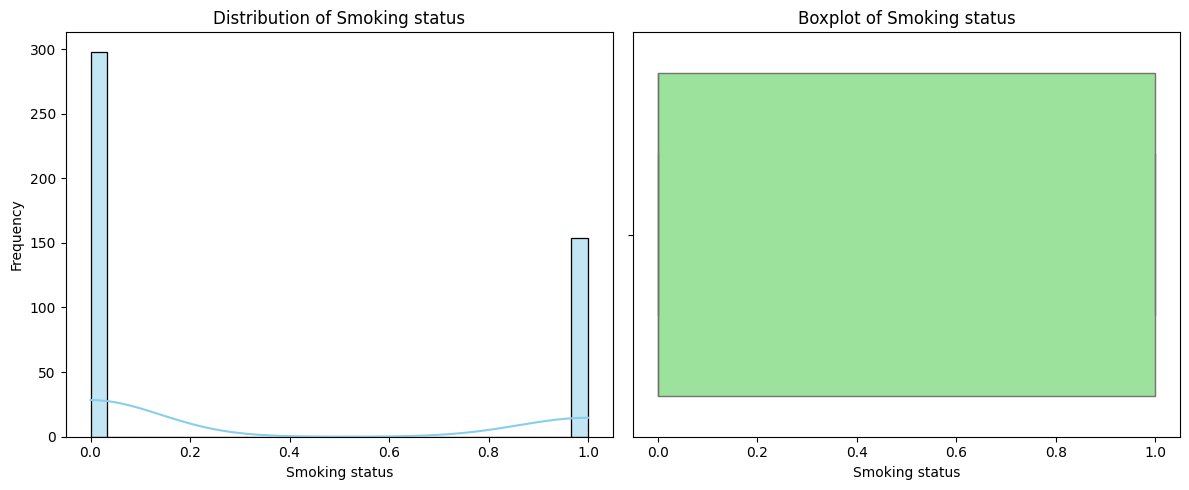

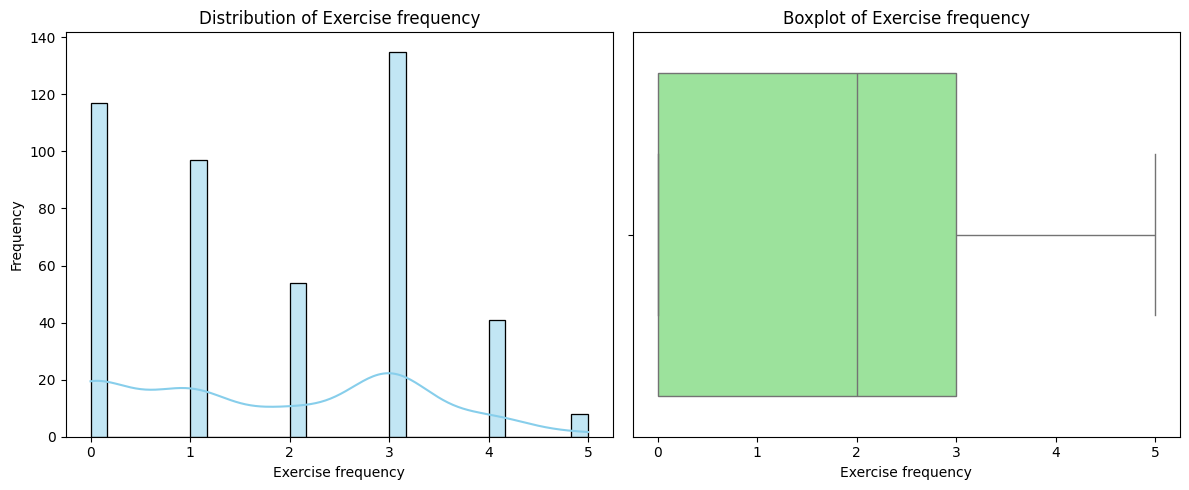

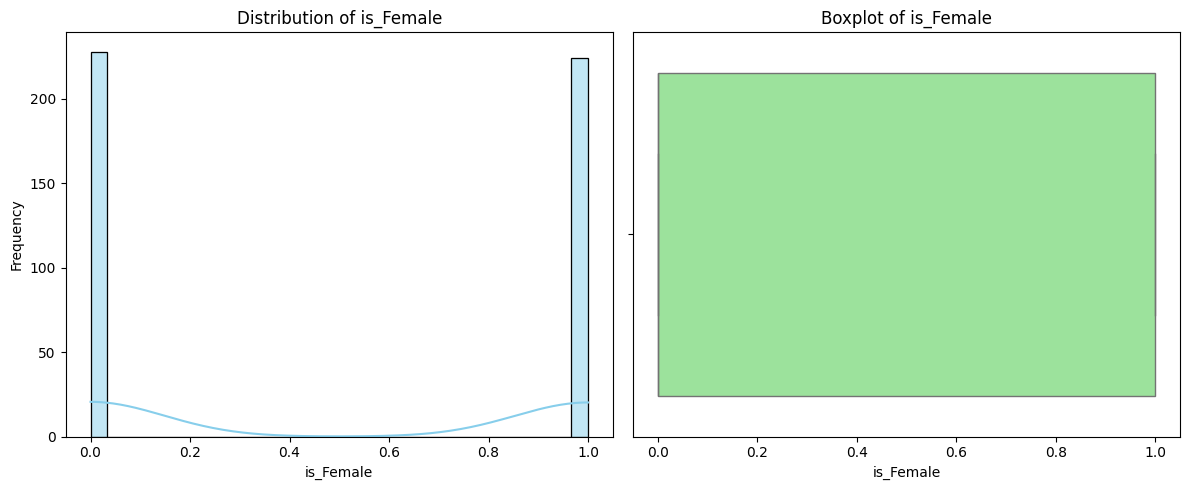

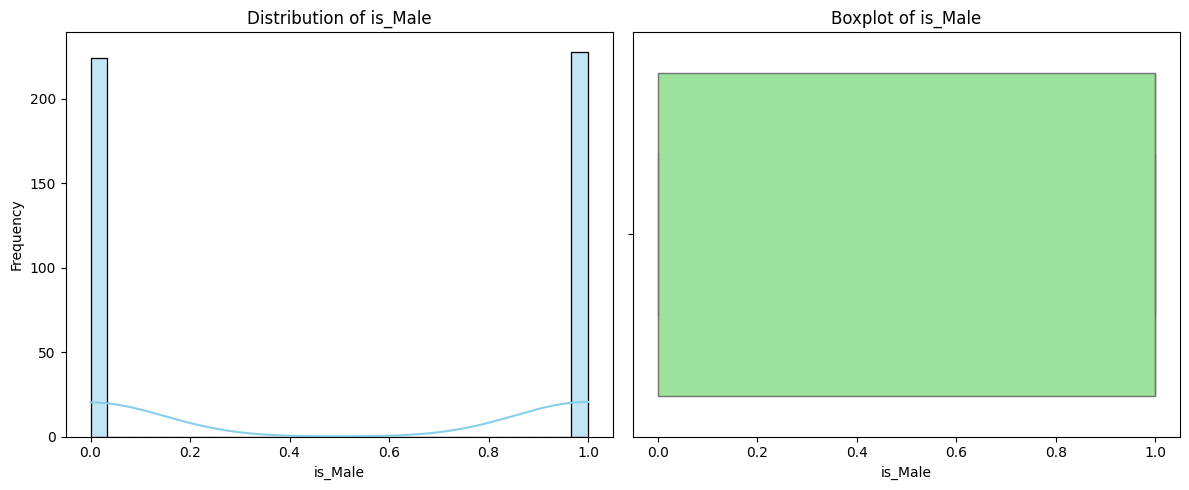

/tmp/ipykernel_45404/3010801213.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_Male', y=feature, palette='Set2')


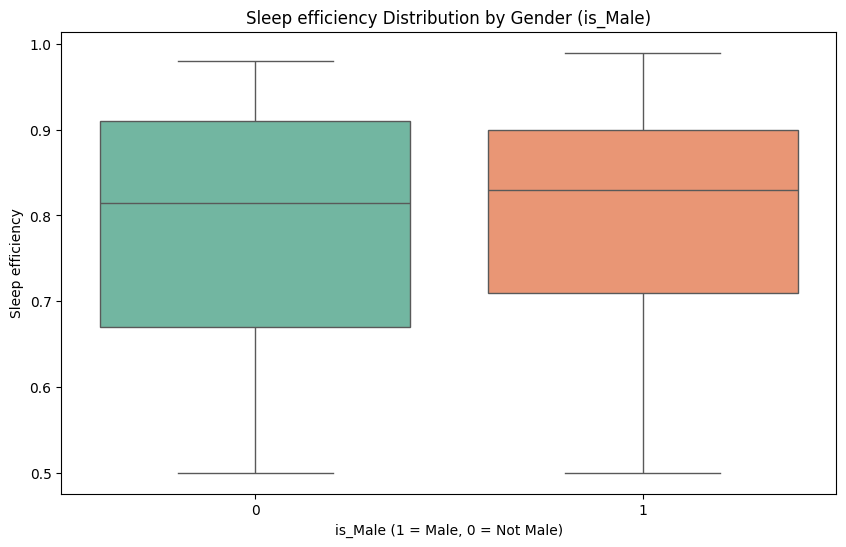

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the dataset
efficiency_df = pd.read_csv('./content/Sleep_Efficiency.csv')

# Drop unnecessary columns
columns_to_drop = ['ID']  # Replace with actual column names
efficiency_df = efficiency_df.drop(columns=columns_to_drop, errors='ignore')
print("Columns after dropping unnecessary ones:", efficiency_df.columns.tolist())

# Function to convert datetime string to float
def datetime_to_float(datetime_str):
    dt = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")  # Adjusted format
    return dt.hour + dt.minute / 60 + dt.second / 3600

# Convert 'Bedtime' and 'Wakeup time' to float
efficiency_df['Bedtime'] = efficiency_df['Bedtime'].apply(datetime_to_float)
efficiency_df['Wakeup time'] = efficiency_df['Wakeup time'].apply(datetime_to_float)

# Fill missing 'Caffeine consumption' based on most frequent value for same 'Sleep duration'
most_frequent_caffeine = (
    efficiency_df.groupby('Sleep duration')['Caffeine consumption']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)
efficiency_df['Caffeine consumption'] = efficiency_df.apply(
    lambda row: most_frequent_caffeine[row['Sleep duration']]
    if pd.isna(row['Caffeine consumption']) else row['Caffeine consumption'], axis=1
)

# Fill missing 'Alcohol consumption' based on most frequent value for same 'Sleep duration'
most_frequent_alcohol = (
    efficiency_df.groupby('Sleep duration')['Alcohol consumption']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)
efficiency_df['Alcohol consumption'] = efficiency_df.apply(
    lambda row: most_frequent_alcohol[row['Sleep duration']]
    if pd.isna(row['Alcohol consumption']) else row['Alcohol consumption'], axis=1
)
efficiency_df['Alcohol consumption'] = efficiency_df['Alcohol consumption'].apply(lambda x: 0 if x == 0 else 1)

# Convert 'Smoking status' to binary
efficiency_df['Smoking status'] = efficiency_df['Smoking status'].replace({'No': 0, 'Yes': 1})

# Fill missing 'Exercise frequency' based on most frequent value for same 'Sleep duration'
most_frequent_exercise = (
    efficiency_df.groupby('Sleep duration')['Exercise frequency']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)
efficiency_df['Exercise frequency'] = efficiency_df.apply(
    lambda row: most_frequent_exercise[row['Sleep duration']]
    if pd.isna(row['Exercise frequency']) else row['Exercise frequency'], axis=1
)

# Fill missing 'Awakenings' based on most frequent value for same 'Sleep efficiency'
most_frequent_awakenings = (
    efficiency_df.groupby('Sleep efficiency')['Awakenings']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)
efficiency_df['Awakenings'] = efficiency_df.apply(
    lambda row: most_frequent_awakenings[row['Sleep efficiency']]
    if pd.isna(row['Awakenings']) else row['Awakenings'], axis=1
)

# Standardize the Gender column and apply one-hot encoding
efficiency_df['Gender'] = efficiency_df['Gender'].str.strip().str.capitalize()
gender_one_hot = pd.get_dummies(efficiency_df['Gender'], prefix='is')
gender_one_hot = gender_one_hot.astype(int)
efficiency_df = pd.concat([efficiency_df.drop(columns=['Gender']), gender_one_hot], axis=1)

# Display basic statistics
print("Dataset statistics:")
print(efficiency_df.describe())

# Display the first few rows of the updated DataFrame
print("First few rows of the updated DataFrame:")
print(efficiency_df.head())

# Check for missing values
print("Missing values in each column:")
print(efficiency_df.isnull().sum())

# Visualize feature distributions
def visualize_feature_distributions(df):
    numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    for feature in numeric_features:
        plt.figure(figsize=(12, 5))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[feature], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        
        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[feature], color='lightgreen')
        plt.title(f'Boxplot of {feature}')
        plt.xlabel(feature)
        
        plt.tight_layout()
        plt.show()

# Visualize feature distributions
visualize_feature_distributions(efficiency_df)

# Visualize feature distributions by gender
def visualize_by_gender(df, feature):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='is_Male', y=feature, palette='Set2')
    plt.title(f'{feature} Distribution by Gender (is_Male)')
    plt.xlabel('is_Male (1 = Male, 0 = Not Male)')
    plt.ylabel(feature)
    plt.show()

# Example: Visualize 'Sleep efficiency' by gender
if 'Sleep efficiency' in efficiency_df.columns:
    visualize_by_gender(efficiency_df, 'Sleep efficiency')

In [6]:
# Clean column names
def clean_columns(df):
    return df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("(", "").replace(")", ""))

student_df = clean_columns(student_df)
efficiency_df = clean_columns(efficiency_df)
productivity_df = clean_columns(productivity_df)

print(student_df.columns.tolist())
print(productivity_df.columns.tolist())


['age', 'university_year', 'sleep_duration', 'study_hours', 'screen_time', 'caffeine_intake', 'physical_activity', 'sleep_quality', 'weekday_sleep_start', 'weekend_sleep_start', 'weekday_sleep_end', 'weekend_sleep_end', 'is_female', 'is_male', 'is_other']
['age', 'sleep_start_time', 'sleep_end_time', 'total_sleep_hours', 'sleep_quality', 'exercise_mins/day', 'caffeine_intake_mg', 'screen_time_before_bed_mins', 'work_hours_hrs/day', 'productivity_score', 'mood_score', 'stress_level', 'is_female', 'is_male', 'is_other']


In [7]:
# List of DataFrames (replace with your actual DataFrames)
dataframes = [
    student_df,
    efficiency_df,
    productivity_df
]

# Mapping of equivalent column names to a standardized name
column_mapping = {
    'physical_activity': 'exercise_frequency',
    'exercise_mins/day': 'exercise_frequency',
    'caffeine_intake': 'caffeine_consumption',
    'caffeine_intake_mg': 'caffeine_consumption',
    'sleep_hours': 'sleep_duration',
    'total_sleep_hours': 'sleep_duration',
    'study_hours': 'work_hours',
    'work_hours_hrs/day': 'work_hours',
}

# Apply the mapping to each DataFrame
for i, df in enumerate(dataframes):
    df.rename(columns=column_mapping, inplace=True)

print(student_df.columns.tolist())
print(efficiency_df.columns.tolist())
print(productivity_df.columns.tolist())



['age', 'university_year', 'sleep_duration', 'work_hours', 'screen_time', 'caffeine_consumption', 'exercise_frequency', 'sleep_quality', 'weekday_sleep_start', 'weekend_sleep_start', 'weekday_sleep_end', 'weekend_sleep_end', 'is_female', 'is_male', 'is_other']
['age', 'bedtime', 'wakeup_time', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'smoking_status', 'exercise_frequency', 'is_female', 'is_male']
['age', 'sleep_start_time', 'sleep_end_time', 'sleep_duration', 'sleep_quality', 'exercise_frequency', 'caffeine_consumption', 'screen_time_before_bed_mins', 'work_hours', 'productivity_score', 'mood_score', 'stress_level', 'is_female', 'is_male', 'is_other']


In [8]:
# Explore common features between DataFrames
common_features = set(productivity_df.columns).intersection(set(student_df.columns))

print("Productivity and student common: ", common_features)

common_features = set(efficiency_df.columns).intersection(set(student_df.columns))

print("Efficiency and student common: ", common_features)

Productivity and student common:  {'sleep_quality', 'sleep_duration', 'work_hours', 'exercise_frequency', 'caffeine_consumption', 'is_other', 'is_male', 'is_female', 'age'}
Efficiency and student common:  {'sleep_duration', 'exercise_frequency', 'caffeine_consumption', 'is_male', 'is_female', 'age'}


In [9]:
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Define target columns for each DataFrame
dataframes_with_targets = {
    "productivity_df": (productivity_df, ['age', 'sleep_start_time', 'sleep_end_time', 'sleep_duration', 'sleep_quality', 'exercise_frequency', 'caffeine_consumption', 'screen_time_before_bed_mins', 'work_hours', 'productivity_score', 'mood_score', 'stress_level', 'is_female', 'is_male', 'is_other']),
}

updated_dataframes = {}

for name, (df, target_columns) in dataframes_with_targets.items():
    if isinstance(target_columns, str):
        target_columns = [target_columns]
    
    # Find commont features between productivity_df and student_df
    if name == "productivity_df":
        dropped_features_sets = []
        for target_column in target_columns:
            # `target_column`만 제외하고 나머지 모든 feature를 X로 사용
            X = df.drop(columns=[target_column], errors='ignore')  # Drop only the current target column
            y = df[target_column] if target_column in df.columns else None
            
            if y is not None and len(X.columns) > 0:
                X = X.select_dtypes(include=[float, int])  # Select only numeric columns
                X = X.clip(lower=0)  # Clip negative values to 0 (required for chi2)
                if y.dtype in [float, int]:
                    y = (y > y.median()).astype(int)  # Binarize the target variable for chi2
                k = min(11, len(X.columns))  # Select up to 11 best features
                best_features = SelectKBest(score_func=chi2, k=k)
                feature_fit = best_features.fit(X, y)
                featureScores = pd.DataFrame({
                    'Feature': X.columns,
                    'Score': feature_fit.scores_
                }).sort_values(by='Score', ascending=False)
                
                # Print the feature scores for the current target
                print(f"\nTop Features for {name} (Target: {target_column}):")
                print(featureScores)



Top Features for productivity_df (Target: age):
                        Feature     Score
10                 stress_level  3.673026
6   screen_time_before_bed_mins  3.571520
8            productivity_score  0.976528
11                    is_female  0.864219
4            exercise_frequency  0.523111
13                     is_other  0.402772
1                sleep_end_time  0.293028
3                 sleep_quality  0.221222
2                sleep_duration  0.211726
5          caffeine_consumption  0.133962
12                      is_male  0.092494
7                    work_hours  0.071007
9                    mood_score  0.026531
0              sleep_start_time  0.000011

Top Features for productivity_df (Target: sleep_start_time):
                        Feature        Score
1                sleep_end_time  1007.229987
5          caffeine_consumption    22.868050
6   screen_time_before_bed_mins     4.255205
10                 stress_level     4.129263
0                           age   

In [10]:
print(efficiency_df.columns.tolist())

['age', 'bedtime', 'wakeup_time', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'deep_sleep_percentage', 'light_sleep_percentage', 'awakenings', 'caffeine_consumption', 'alcohol_consumption', 'smoking_status', 'exercise_frequency', 'is_female', 'is_male']


In [11]:
# Explore common features between DataFrames
productivity_common_features = set(productivity_df.columns).intersection(set(student_df.columns))
print(productivity_common_features)

efficiency_common_features = set(efficiency_df.columns).intersection(set(student_df.columns))
print(efficiency_common_features)

{'sleep_quality', 'sleep_duration', 'work_hours', 'exercise_frequency', 'caffeine_consumption', 'is_other', 'is_male', 'is_female', 'age'}
{'sleep_duration', 'exercise_frequency', 'caffeine_consumption', 'is_male', 'is_female', 'age'}


In [12]:
# Drop unnecessary columns from efficiency_df
columns_to_drop = ['deep_sleep_percentage', 'light_sleep_percentage', 'awakenings']  # Replace with actual column names
efficiency_df_updated = efficiency_df.drop(columns=columns_to_drop, errors='ignore')

print(efficiency_df_updated.columns.tolist())
print(student_df.columns.tolist())

print(set(efficiency_df_updated.columns).intersection(set(student_df.columns)))

['age', 'bedtime', 'wakeup_time', 'sleep_duration', 'sleep_efficiency', 'rem_sleep_percentage', 'caffeine_consumption', 'alcohol_consumption', 'smoking_status', 'exercise_frequency', 'is_female', 'is_male']
['age', 'university_year', 'sleep_duration', 'work_hours', 'screen_time', 'caffeine_consumption', 'exercise_frequency', 'sleep_quality', 'weekday_sleep_start', 'weekend_sleep_start', 'weekday_sleep_end', 'weekend_sleep_end', 'is_female', 'is_male', 'is_other']
{'sleep_duration', 'exercise_frequency', 'caffeine_consumption', 'is_male', 'is_female', 'age'}


In [13]:
productivity_df_updated = productivity_df.copy()

In [14]:

print(efficiency_df_updated.describe())
print(productivity_df_updated.describe())
print(student_df.describe())

print(productivity_df_updated.columns.tolist())

              age     bedtime  wakeup_time  sleep_duration  sleep_efficiency  \
count  452.000000  452.000000   452.000000      452.000000        452.000000   
mean    40.285398   10.839602     7.101770        7.465708          0.788916   
std     13.172250   10.543924     1.955899        0.866625          0.135237   
min      9.000000    0.000000     3.000000        5.000000          0.500000   
25%     29.000000    1.000000     5.500000        7.000000          0.697500   
50%     40.000000    2.500000     7.000000        7.500000          0.820000   
75%     52.000000   22.000000     9.000000        8.000000          0.900000   
max     69.000000   23.000000    12.500000       10.000000          0.990000   

       rem_sleep_percentage  caffeine_consumption  alcohol_consumption  \
count            452.000000            452.000000           452.000000   
mean              22.615044             23.230088             0.424779   
std                3.525963             29.867931        

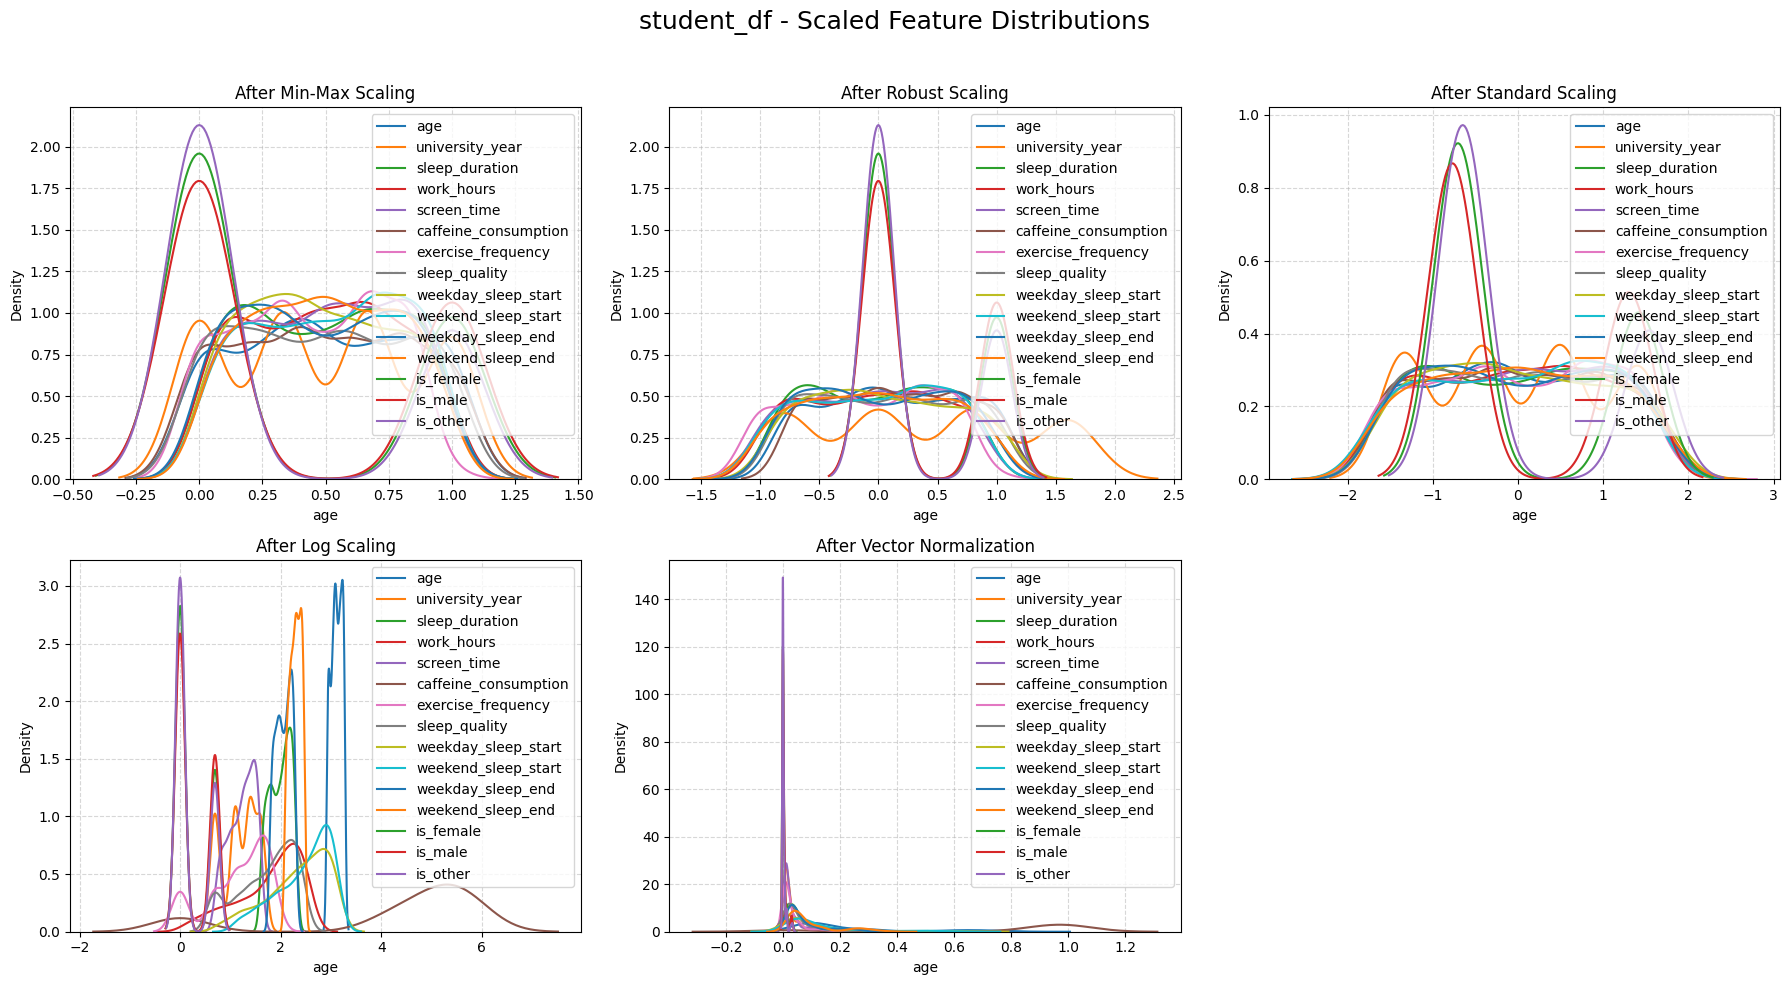

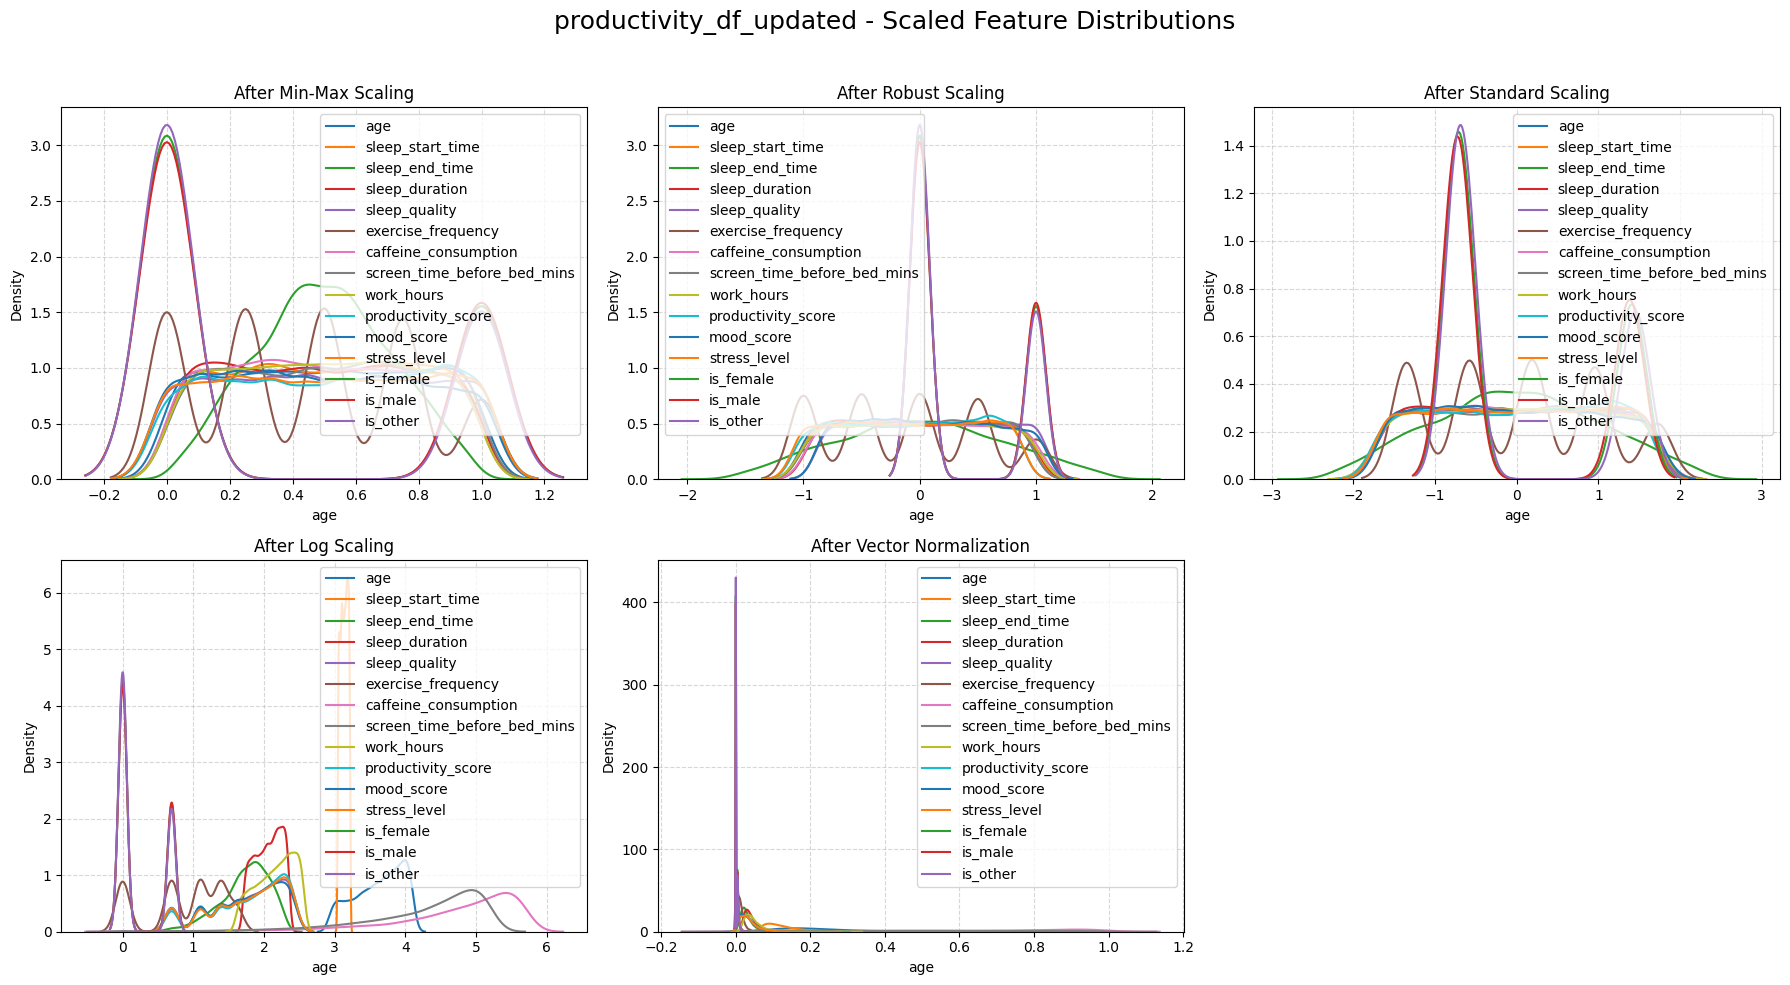

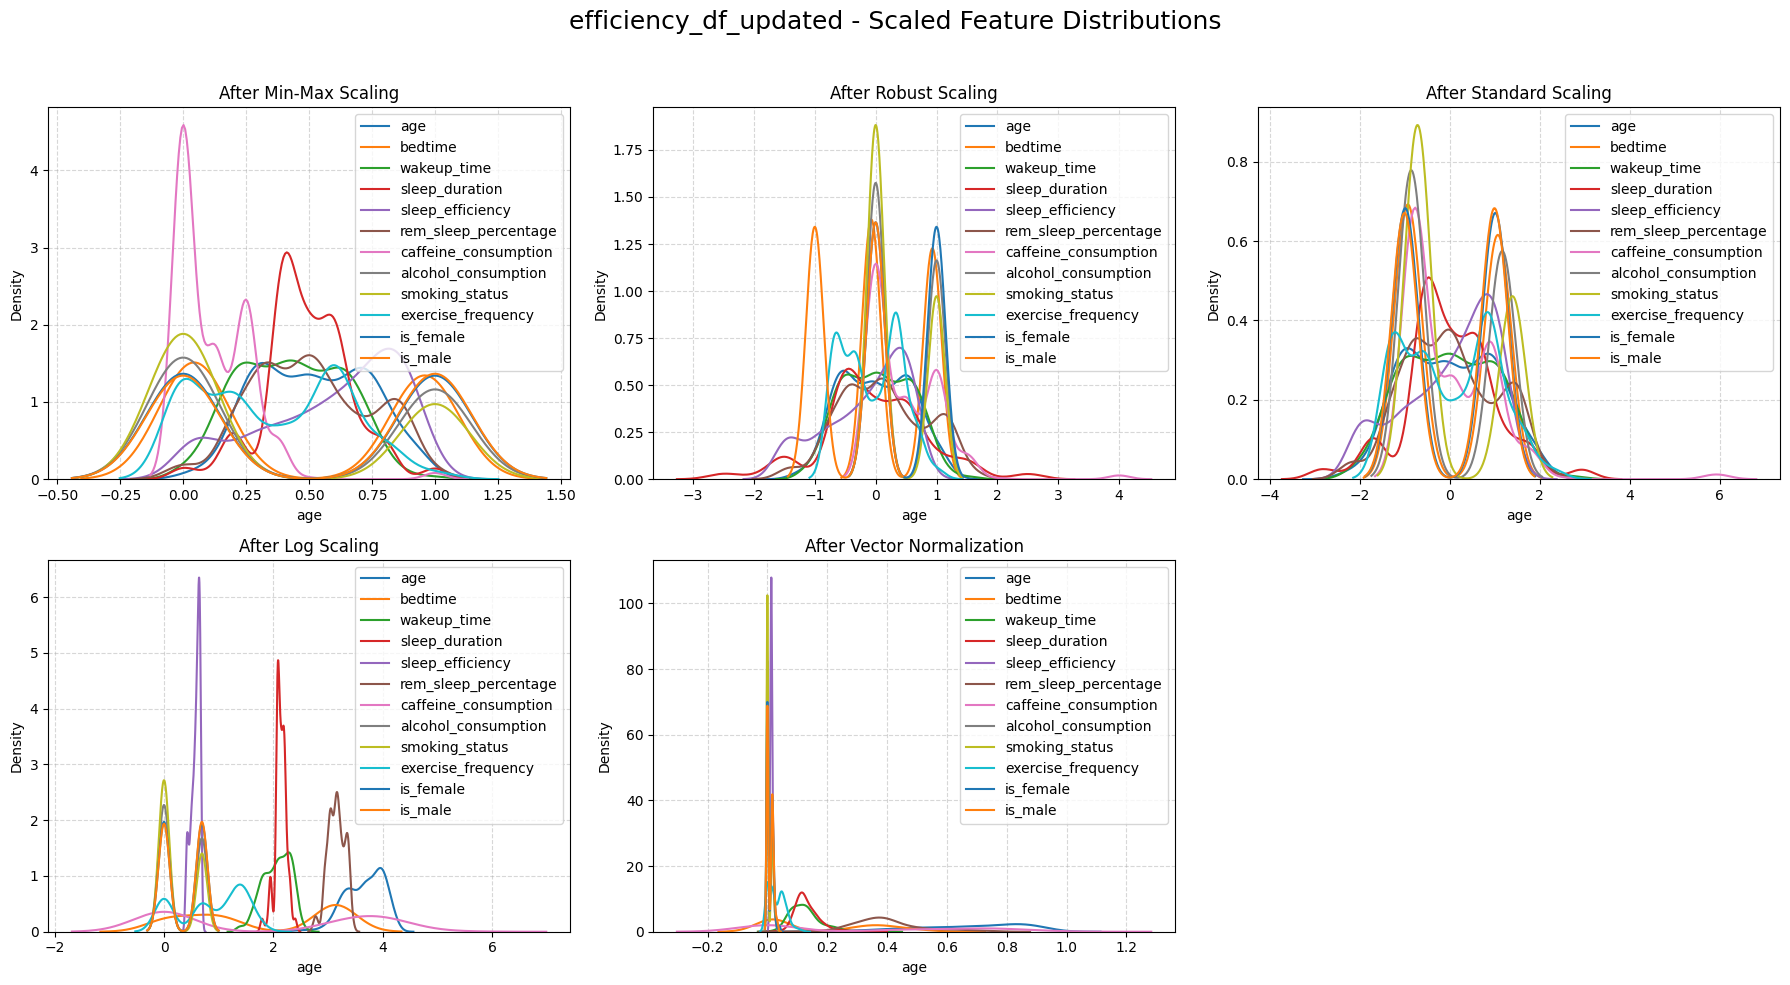

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer

# DataFrames list
dataframes = {
    "student_df": student_df,
    "productivity_df_updated": productivity_df_updated,
    "efficiency_df_updated": efficiency_df_updated
}

# Repeat for each DataFrame
for df_name, df in dataframes.items():
    numeric_columns = df.select_dtypes(include=[float, int]).columns

    # Use various scalers
    scalers = {
        "Min-Max Scaling": MinMaxScaler(),
        "Robust Scaling": RobustScaler(),
        "Standard Scaling": StandardScaler(),
        "Log Scaling": None,
        "Vector Normalization": Normalizer()
    }

    scaled_dfs = {}
    for name, scaler in scalers.items():
        if name == "Log Scaling":
            # Log scaling is applied only to positive values
            scaled = np.log1p(df[numeric_columns])
        else:
            scaled = scaler.fit_transform(df[numeric_columns])
        scaled_dfs[name] = pd.DataFrame(scaled, columns=numeric_columns)

    # visualize the distributions of scaled features
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    for idx, (name, scaled_df) in enumerate(scaled_dfs.items()):
        for col in scaled_df.columns:
            sns.kdeplot(scaled_df[col], ax=axes[idx], label=col)
        axes[idx].set_title(f"After {name}")
        axes[idx].set_ylabel("Density")
        axes[idx].legend()
        axes[idx].grid(True, linestyle='--', alpha=0.5)
    # Hide empty subplots
    for i in range(len(scaled_dfs), len(axes)):
        axes[i].axis('off')
    plt.suptitle(f"{df_name} - Scaled Feature Distributions", fontsize=18)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# Dataframe list
dataframes = {
    "student_df": student_df,
    "productivity_df_updated": productivity_df_updated,
    "efficiency_df_updated": efficiency_df_updated
}

# Set scalers for each DataFrame
scalers = {
    "student_df": RobustScaler(),
    "productivity_df_updated": StandardScaler(),
    "efficiency_df_updated": RobustScaler()
}

# Save scaling data to dictionary
scaled_dataframes = {}

# Use compatible scaler for each DataFrame
for name, df in dataframes.items():
    scaler = scalers[name]
    numeric_columns = df.select_dtypes(include=[float, int]).columns
    scaled_values = scaler.fit_transform(df[numeric_columns])
    scaled_df = df.copy()
    scaled_df[numeric_columns] = scaled_values
    scaled_dataframes[name] = scaled_df
    print(f"{name} scaled with {scaler.__class__.__name__} successfully!")

# Access the scaled DataFrames
student_df_scaled = scaled_dataframes["student_df"]
productivity_df_scaled = scaled_dataframes["productivity_df_updated"]
efficiency_df_scaled = scaled_dataframes["efficiency_df_updated"]

# Result check
print(student_df_scaled.head())
print(productivity_df_scaled.head())
print(efficiency_df_scaled.head())


student_df scaled with RobustScaler successfully!
productivity_df_updated scaled with StandardScaler successfully!
efficiency_df_updated scaled with RobustScaler successfully!
    age  university_year  sleep_duration  work_hours  screen_time  \
0  0.75              0.0        0.444444    0.313559     0.533333   
1  0.00             -0.8       -0.074074   -0.008475    -0.466667   
2  0.25              1.6       -0.518519    0.110169     0.866667   
3  0.75              1.6       -0.074074    0.432203     0.133333   
4 -0.25              1.6       -0.666667   -0.567797     0.066667   

   caffeine_consumption  exercise_frequency  sleep_quality  \
0              0.000000           -0.666667            1.0   
1              1.000000            0.000000           -0.6   
2              1.000000           -0.333333            0.0   
3              0.666667           -0.333333            0.8   
4             -0.666667            0.333333           -0.4   

   weekday_sleep_start  weekend_slee

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import r2_score

# Prepared Dataframe with scaled features
df = productivity_df_scaled

productivity_common_features = list(productivity_common_features)
efficiency_common_features = list(efficiency_common_features)

# Task 1: Predict `productivity_score` and `mood_score`
X_task1 = df[productivity_common_features]
y_productivity = df['productivity_score']
y_mood = df['mood_score']

# Task 2: Predict `stress_level`
X_task2 = df[efficiency_common_features]
y_stress = df['stress_level']

# continousr target -> binary classification
y_productivity_class = (y_productivity > y_productivity.median()).astype(int)
y_mood_class = (y_mood > y_mood.median()).astype(int)
y_stress_class = (y_stress > y_stress.median()).astype(int)

# Regression model
regression_models = {
    "Linear Regression": LinearRegression(),
    "Poly2 Regression": (PolynomialFeatures(degree=2), LinearRegression()),
    "Poly3 Regression": (PolynomialFeatures(degree=3), LinearRegression())
}

# Classification models
classification_models = {
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Save result
results_list = []

# Task 1: productivity_score, mood_score (regression + classification)
for target, y, y_class, X in [
    ("productivity_score", y_productivity, y_productivity_class, X_task1),
    ("mood_score", y_mood, y_mood_class, X_task1)
]:
    # Regression
    for model_name, model in regression_models.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        if isinstance(model, tuple):  # Polynomial
            poly, lr = model
            X_train_poly = poly.fit_transform(X_train)
            X_test_poly = poly.transform(X_test)
            lr.fit(X_train_poly, y_train)
            y_pred = lr.predict(X_test_poly)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        results_list.append({
            "Task": "Task 1",
            "Target": target,
            "Model": model_name,
            "Metric": "R2",
            "Score": r2
        })
        print(f"[Task 1][{target}] {model_name} - R2: {r2:.4f}")

    # Classification
    for model_name, model in classification_models.items():
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y_class, cv=kf, scoring='accuracy')
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        results_list.append({
            "Task": "Task 1",
            "Target": target,
            "Model": model_name,
            "Metric": "Accuracy",
            "Score": mean_score
        })
        print(f"[Task 1][{target}] {model_name} - Accuracy: {mean_score:.4f} (+/- {std_score:.4f})")

# Task 2: Predict `stress_level`
# Regression
for model_name, model in regression_models.items():
    X_train, X_test, y_train, y_test = train_test_split(X_task2, y_stress, test_size=0.2, random_state=42)
    if isinstance(model, tuple):  # Polynomial
        poly, lr = model
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        lr.fit(X_train_poly, y_train)
        y_pred = lr.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results_list.append({
        "Task": "Task 2",
        "Target": "stress_level",
        "Model": model_name,
        "Metric": "R2",
        "Score": r2
    })
    print(f"[Task 2][stress_level] {model_name} - R2: {r2:.4f}")

# Classifier
for model_name, model in classification_models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_task2, y_stress_class, cv=kf, scoring='accuracy')
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    results_list.append({
        "Task": "Task 2",
        "Target": "stress_level",
        "Model": model_name,
        "Metric": "Accuracy",
        "Score": mean_score
    })
    print(f"[Task 2][stress_level] {model_name} - Accuracy: {mean_score:.4f} (+/- {std_score:.4f})")

# Return results as DataFrame
results_df = pd.DataFrame(results_list)
print("\n=== Entire model result describe ===")
print(results_df)


[Task 1][productivity_score] Linear Regression - R2: 0.0032
[Task 1][productivity_score] Poly2 Regression - R2: 0.0004
[Task 1][productivity_score] Poly3 Regression - R2: -0.0310
[Task 1][productivity_score] k-NN - Accuracy: 0.5056 (+/- 0.0130)
[Task 1][productivity_score] Decision Tree - Accuracy: 0.5106 (+/- 0.0136)
[Task 1][productivity_score] Random Forest - Accuracy: 0.5442 (+/- 0.0124)
[Task 1][productivity_score] Gradient Boosting - Accuracy: 0.5566 (+/- 0.0114)
[Task 1][mood_score] Linear Regression - R2: -0.0022
[Task 1][mood_score] Poly2 Regression - R2: -0.0029
[Task 1][mood_score] Poly3 Regression - R2: -0.0244
[Task 1][mood_score] k-NN - Accuracy: 0.5104 (+/- 0.0119)
[Task 1][mood_score] Decision Tree - Accuracy: 0.5100 (+/- 0.0136)
[Task 1][mood_score] Random Forest - Accuracy: 0.5086 (+/- 0.0051)
[Task 1][mood_score] Gradient Boosting - Accuracy: 0.5026 (+/- 0.0059)
[Task 2][stress_level] Linear Regression - R2: -0.0010
[Task 2][stress_level] Poly2 Regression - R2: -0.01

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd


df_productivity = productivity_df_scaled        
df_efficiency = efficiency_df_scaled           
student_df = student_df_scaled                 

# Model definition
productivity_model = GradientBoostingRegressor(random_state=42)
mood_model = GradientBoostingRegressor(random_state=42)
stress_model = GradientBoostingRegressor(random_state=42)

# Train model
productivity_model.fit(df_productivity[productivity_common_features], df_productivity['productivity_score'])
mood_model.fit(df_productivity[productivity_common_features], df_productivity['mood_score'])
stress_model.fit(df_productivity[efficiency_common_features], df_productivity['stress_level'])

# Copt student data
student_df_updated = student_df.copy()

student_df_updated['predicted_productivity_score'] = productivity_model.predict(student_df_updated[productivity_common_features])
student_df_updated['predicted_mood_score'] = mood_model.predict(student_df_updated[productivity_common_features])
student_df_updated['predicted_stress_level'] = stress_model.predict(student_df_updated[efficiency_common_features])

# Save result
student_df_updated.to_csv('./content/student_df_updated.csv', index=False)

# Print result
print(student_df_updated.head())




    age  university_year  sleep_duration  work_hours  screen_time  \
0  0.75              0.0        0.444444    0.313559     0.533333   
1  0.00             -0.8       -0.074074   -0.008475    -0.466667   
2  0.25              1.6       -0.518519    0.110169     0.866667   
3  0.75              1.6       -0.074074    0.432203     0.133333   
4 -0.25              1.6       -0.666667   -0.567797     0.066667   

   caffeine_consumption  exercise_frequency  sleep_quality  \
0              0.000000           -0.666667            1.0   
1              1.000000            0.000000           -0.6   
2              1.000000           -0.333333            0.0   
3              0.666667           -0.333333            0.8   
4             -0.666667            0.333333           -0.4   

   weekday_sleep_start  weekend_sleep_start  weekday_sleep_end  \
0             0.350224            -0.861416           0.253317   
1            -0.189270            -0.557328           0.639324   
2             

In [19]:
student_augmented_df = pd.read_csv('./content/student_df_updated.csv')

print(student_augmented_df.columns.tolist())
print(student_augmented_df.head())
print(student_augmented_df.describe())


['age', 'university_year', 'sleep_duration', 'work_hours', 'screen_time', 'caffeine_consumption', 'exercise_frequency', 'sleep_quality', 'weekday_sleep_start', 'weekend_sleep_start', 'weekday_sleep_end', 'weekend_sleep_end', 'is_female', 'is_male', 'is_other', 'predicted_productivity_score', 'predicted_mood_score', 'predicted_stress_level']
    age  university_year  sleep_duration  work_hours  screen_time  \
0  0.75              0.0        0.444444    0.313559     0.533333   
1  0.00             -0.8       -0.074074   -0.008475    -0.466667   
2  0.25              1.6       -0.518519    0.110169     0.866667   
3  0.75              1.6       -0.074074    0.432203     0.133333   
4 -0.25              1.6       -0.666667   -0.567797     0.066667   

   caffeine_consumption  exercise_frequency  sleep_quality  \
0              0.000000           -0.666667            1.0   
1              1.000000            0.000000           -0.6   
2              1.000000           -0.333333            0

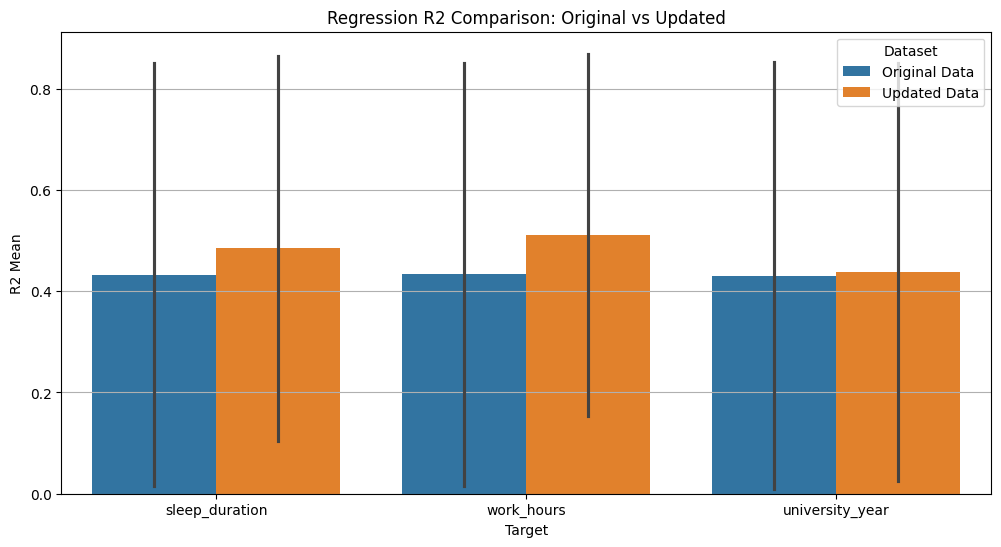

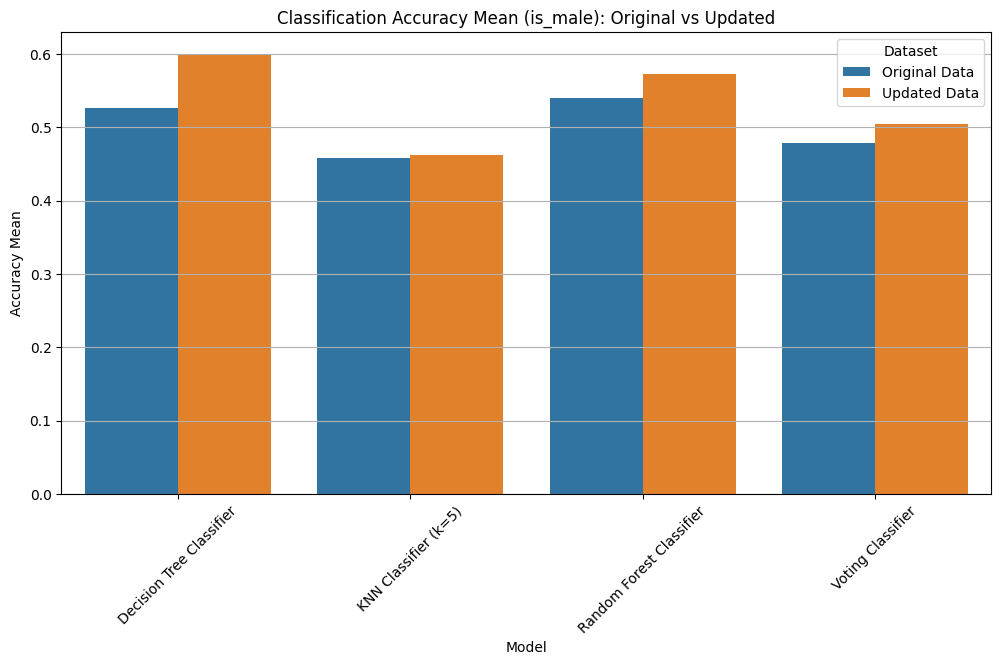

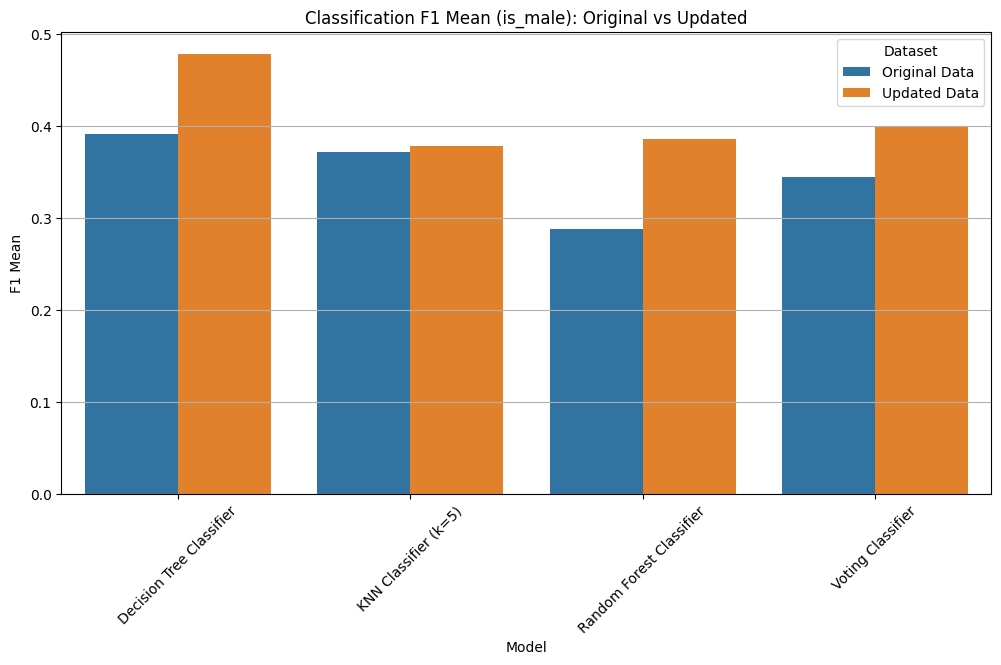

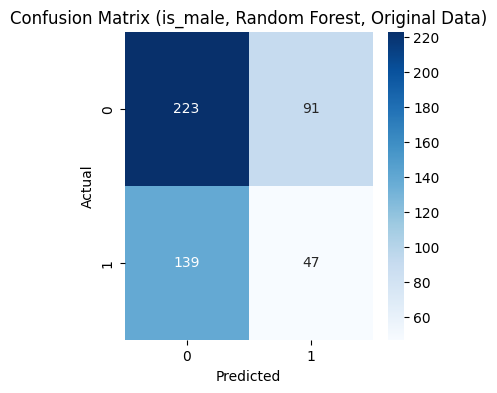

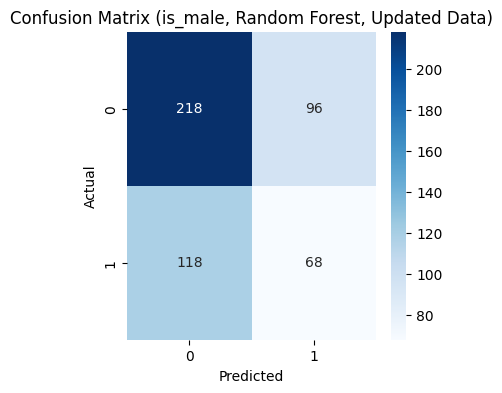

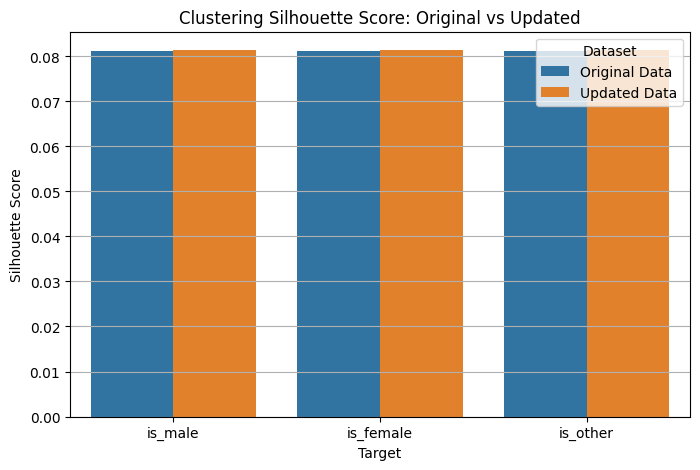

=== Regression result ===
          Dataset           Target                    Model   R2 Mean  R2 Std  \
0   Original Data   sleep_duration        Linear Regression  0.014716       0   
1   Original Data   sleep_duration  Random Forest Regressor  0.850631       0   
2   Original Data       work_hours        Linear Regression  0.015587       0   
3   Original Data       work_hours  Random Forest Regressor  0.851295       0   
4   Original Data  university_year        Linear Regression  0.009243       0   
5   Original Data  university_year  Random Forest Regressor  0.852212       0   
6    Updated Data   sleep_duration        Linear Regression  0.104835       0   
7    Updated Data   sleep_duration  Random Forest Regressor  0.864045       0   
8    Updated Data       work_hours        Linear Regression  0.153918       0   
9    Updated Data       work_hours  Random Forest Regressor  0.869171       0   
10   Updated Data  university_year        Linear Regression  0.025258       0   
11

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE

def evaluate_dataset(df, dataset_name):
    regression_targets = ['sleep_duration', 'work_hours', 'university_year']
    classification_targets = ['is_male', 'is_female', 'is_other']
    clustering_targets = ['is_male', 'is_female', 'is_other']
    exclude_features = regression_targets + classification_targets
    feature_cols = [feat for feat in df.columns if feat not in exclude_features]
    X_reg = df[feature_cols]

    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    reg_models = {
        'Linear Regression': LinearRegression(),
        'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
    }

    # Regression
    reg_results = []
    for target in regression_targets:
        y = df[target]
        for model_name, model in reg_models.items():
            model.fit(X_reg, y)
            y_pred = model.predict(X_reg)
            reg_results.append({
                'Dataset': dataset_name,
                'Target': target,
                'Model': model_name,
                'R2 Mean': r2_score(y, y_pred),
                'R2 Std': 0,
                'MAE Mean': mean_absolute_error(y, y_pred),
                'MAE Std': 0,
                'MSE Mean': mean_squared_error(y, y_pred),
                'MSE Std': 0,
                'RMSE Mean': np.sqrt(mean_squared_error(y, y_pred)),
                'RMSE Std': 0
            })
    reg_results_df = pd.DataFrame(reg_results)

    # Classification (K-Fold Cross-Validation)
    clf_models = {
        'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
        'KNN Classifier (k=5)': KNeighborsClassifier(n_neighbors=5),
        'Random Forest Classifier': RandomForestClassifier(n_estimators=100, random_state=42),
        'Voting Classifier': VotingClassifier([
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier(n_neighbors=5)),
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
        ], voting='soft')
    }
    clf_results = []
    confusion_matrices = {}
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for target in classification_targets:
        y = df[target]
        for model_name, model in clf_models.items():
            acc_scores = []
            f1_scores = []
            cm_total = np.zeros((2, 2), dtype=int)
            for train_index, test_index in skf.split(X_reg, y):
                X_train, X_test = X_reg.iloc[train_index], X_reg.iloc[test_index]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                if len(np.unique(y_train)) < 2:
                    X_train_res, y_train_res = X_train, y_train
                else:
                    smote = SMOTE(random_state=42)
                    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

                model.fit(X_train_res, y_train_res)
                y_pred = model.predict(X_test)

                acc_scores.append(accuracy_score(y_test, y_pred))
                f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
                cm_total += confusion_matrix(y_test, y_pred, labels=[0, 1])
            clf_results.append({
                'Dataset': dataset_name,
                'Target': target,
                'Model': model_name,
                'Accuracy Mean': np.mean(acc_scores),
                'Accuracy Std': np.std(acc_scores),
                'F1 Mean': np.mean(f1_scores),
                'F1 Std': np.std(f1_scores)
            })
            confusion_matrices[(target, model_name, dataset_name)] = cm_total
    clf_results_df = pd.DataFrame(clf_results)

    # Clustering
    cluster_results = []
    for target in clustering_targets:
        y = df[target]
        kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_reg)
        sil_score = silhouette_score(X_reg, labels)
        match_accuracy = max(np.mean(labels == y), np.mean(1 - labels == y))
        cluster_results.append({
            'Dataset': dataset_name,
            'Target': target,
            'Model': 'KMeans (n=3)',
            'Silhouette Score': sil_score,
            'Cluster-Label Match Accuracy': match_accuracy
        })
    cluster_results_df = pd.DataFrame(cluster_results)

    return reg_results_df, clf_results_df, cluster_results_df, confusion_matrices

# Load updated data
df_original = student_df_scaled
df_updated = pd.read_csv('./content/student_df_updated.csv')

# Evaluate original and updated datasets
reg_orig, clf_orig, cluster_orig, cm_orig = evaluate_dataset(df_original, 'Original Data')
reg_upd, clf_upd, cluster_upd, cm_upd = evaluate_dataset(df_updated, 'Updated Data')

# Concatenate results
reg_all = pd.concat([reg_orig, reg_upd], ignore_index=True)
clf_all = pd.concat([clf_orig, clf_upd], ignore_index=True)
cluster_all = pd.concat([cluster_orig, cluster_upd], ignore_index=True)

# Visualization method
def plot_confusion_matrix(cm, title, labels=['0', '1']):
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Regression R2
plt.figure(figsize=(12, 6))
sns.barplot(data=reg_all, x='Target', y='R2 Mean', hue='Dataset')
plt.title('Regression R2 Comparison: Original vs Updated')
plt.ylabel('R2 Mean')
plt.grid(axis='y')
plt.show()

# Classification Accuracy/F1
for metric in ['Accuracy Mean', 'F1 Mean']:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=clf_all[clf_all['Target']=='is_male'], x='Model', y=metric, hue='Dataset')
    plt.title(f'Classification {metric} (is_male): Original vs Updated')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Visualize confusion matrix
for dataset_name, cm_dict in zip(['Original Data', 'Updated Data'], [cm_orig, cm_upd]):
    cm = cm_dict.get(('is_male', 'Random Forest Classifier', dataset_name))
    if cm is not None:
        plot_confusion_matrix(cm, f'Confusion Matrix (is_male, Random Forest, {dataset_name})')

# Clustering Silhouette Score
plt.figure(figsize=(8, 5))
sns.barplot(data=cluster_all, x='Target', y='Silhouette Score', hue='Dataset')
plt.title('Clustering Silhouette Score: Original vs Updated')
plt.ylabel('Silhouette Score')
plt.grid(axis='y')
plt.show()

# Print entire result
print("=== Regression result ===")
print(reg_all)
print("\n=== Classificiation result ===")
print(clf_all)
print("\n=== Clustering result ===")
print(cluster_all)
